<h1>PREDITOR DE AÇÕES</h1>

<h2>SUMÁRIO</h2>

---
<h2>INTRODUÇÃO</h2>
<h3>Definição do problema</h3>

Ações representam partes fracionadas de companhias que possuem capital aberto, em outras palavras, são títulos que são negociados na Bolsa de Valores. As ações se enquadram em três categorias: ON, PN e UNIT. A diferença entre elas é que as ações ordinárias (ON) dão direito a voto nas assembleias da empresa e as ações preferenciais (PN) possuem preferência na distribuição dos resultados. Já as UNITs são formadas pelos dois tipos.

Esse tipo de investimento atrai cada vez mais brasileiros para a Bolsa de Valores. A quantidade de investidores pessoa física operando nesse mercado passou dos 3 milhões em 2020, mesmo diante do cenário de pandemia, e o volume financeiro negociado foi de mais de R$6.4 trilhões no mesmo ano.

Para uma modalidade que vem batendo recordes de pontos com seu principal índice de ações, o Ibovespa, o interesse faz todo sentido. Afinal, para quem quer impulsionar as finanças, bons investimentos sempre são bem-vindos.

No entanto, comprar ações é um desafio, tanto para profissionais que trabalham na área, quanto para pessoas comuns que querem investir seu dinheiro. Este é um mercado cheio de incertezas e o conceito de Entropia se faz fortemente neste âmbito. Identificar padrões matemáticos e traçar tendências são uma ótima forma de tentar identificar como as ações se comportam e como irão se comportar ao longo do tempo.

Além de identificar padrões e tendências, é possível também aplicar técnicas mais avançadas para tentar prever o futuro do mercado financeiro. Técnicas como: modelos ARIMA e Redes Neurais Recorrents (RNNS). Tais técnicas exigem um grau de abstração maior, mas compensam como sendo ferramentas poderosas para auxiliar na tomada de decisão.

<h3>Objetivos do projeto</h3>

Dado o contexto, este projeto tem por objetivo, o desenvolvimento de um modelo capaz de prever o preço das ações em um futuro próximo e determinar se o ativo vai se valorizar ou desvalorizar. 

Os dados serão coletados via API fornecida pelo Yahoo. O projeto também aborda uma análise exploratória e descritiva dos dados utilizando diversas ferramentas e técnicas empregadas no uso de análise de séries temporais.

<h3>Conceitos</h3>

**O que são ações?**

Como citado anteriormente, ações são títulos que representam uma pequena parte do valor das companhias ou sociedades anônimas. Ou seja, uma ação é como se fosse uma pequena fatia de uma empresa.

Quando uma instituição decide expandir seu negócio, muitas vezes necessita buscar mais dinheiro para isso. Portanto, muitas delas se tornam companhias de capital aberto e ofertam suas ações — chamadas também de papéis — no mercado para obter recursos. Dessa forma, qualquer pessoa devidamente registrada na Bolsa de Valores pode adquirir esses títulos, passando a integrar o grupo de acionistas da companhia. Para a empresa que está distribuindo as ações no mercado, os recursos captados poderão ser usados como investimento em novos projetos e também elevarão o valor de mercado da companhia.

Para quem investe, as vantagens também são animadoras. Afinal de contas, comprar ações é a forma mais simples de se tornar sócio de uma empresa. Os acionistas passam a ter direitos e deveres, de acordo com a quantidade de ações que adquiriu.

Isto é, acionistas com maior participação têm mais responsabilidades e, da mesma forma, retornos melhores. Independentemente da quantidade de ações compradas, um acionista pode receber parte dos lucros obtidos pela empresa. Só é preciso lembrar que o valor a receber depende da quantidade de ações que se tem em carteira.

Por outro lado, precisamos destacar que quem investe nesse mercado também está sujeito a ter perdas. É por isso que fazer uma aplicação no Mercado de Ações é considerado um investimento de risco.

Isso porque esse mercado é muito dinâmico, isto é, ele se movimenta diariamente de acordo com o interesse dos investidores. Por isso podemos chamar de investimentos de renda variável. Para algumas pessoas, as variações no preço de uma ação são vistas como um grande problema. Na verdade, o que nem todos sabem é que essas oscilações fazem surgir ótimas oportunidades de investimento.

É claro que saber como lidar com essas altas e baixas é fundamental para potencializar resultados e suavizar os riscos. Investir em ações é uma habilidade que é adquirida com tempo, estudo e prática. E, é claro, que não podemos esquecer de que essas habilidades têm que vir junto do uso de boas análises do mercado, seja no curto ou no longo prazo.

*****

**Importações dos pacotes de bibliotecas**

In [239]:
# Análise dos dados
import pandas as pd
import numpy as np 

# Visualização dos dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Computação estatística
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# Imports para análise de dados
import scipy
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Pacote que fornece a API para comunicação com o Yahoo Finances
import yfinance as yf

# Análise dos resultados
from sklearn.metrics import mean_squared_error 

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from pmdarima.arima.utils import ndiffs
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

---
<h2>COLETA DE DADOS</h2>

In [2]:
ticket = yf.Ticker('PETR4.SA')

df = ticket.history(interval='1mo', start='2016-01-01', end='2022-08-01')

In [3]:
lista = '[]'
if not isinstance(lista, list):
    print(True)
else:
    print(False)

True


In [4]:
def coletaDados(list_codigos = [], interval = '1mo', start = '2015-01-01', end='2022-01-01'):
    
    if not isinstance(list_codigos, list):
        aux = list_codigos
        list_codigos = [aux]

    if len(list_codigos) == 0:
        return 'Erro: Insira um código em empresa listada.'


    list_dfs = []
    try:
        for codigo in list_codigos:
            ticket = yf.Ticker(codigo)
            aux = ticket.history(interval=interval, start=start, end=end)
            #aux.reset_index(inplace=True)
            aux['Ticket'] = codigo

            list_dfs.append(aux)

        return list_dfs

    except Exception as e: 
        print(e)
        return 'Erro: Erro ao ler os dados'

In [5]:
df = coletaDados('PETR4.SA', interval='1d', start='2015-01-01', end='2022-08-04')[0]

In [6]:
df.shape

(1886, 8)

---
<h2>ANÁLISE DOS DADOS</h2>

<h3>Análise Exploratória</h3>

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
Date,,,,,,,,
2015-01-02,6.178822,6.178822,5.782982,5.789166,49559500,0.0,0,PETR4.SA
2015-01-05,5.653096,5.684020,5.275810,5.294365,78385100,0.0,0,PETR4.SA
2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA
2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA
2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA


In [8]:
df.shape

(1886, 8)

In [9]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticket          0
dtype: int64

In [10]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
Ticket           object
dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1886.000000,1886.000000,1886.000000,1886.000000,1.886000e+03,1886.000000,1886.0
mean,13.560694,13.770035,13.336253,13.547828,6.148957e+07,0.007529,0.0
std,6.550118,6.631014,6.468965,6.555772,3.284208e+07,0.140298,0.0
min,2.597703,2.640998,2.548223,2.597703,0.000000e+00,0.000000,0.0
25%,8.318834,8.448719,8.134830,8.318833,4.106188e+07,0.000000,0.0
50%,13.090685,13.273024,12.846799,13.081975,5.492630e+07,0.000000,0.0
75%,17.916104,18.130118,17.740709,17.931673,7.385445e+07,0.000000,0.0
max,34.009998,34.660000,33.560001,34.150002,4.902304e+08,3.715490,0.0


In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
Date,,,,,,,,
2015-01-02,6.178822,6.178822,5.782982,5.789166,49559500,0.0,0,PETR4.SA
2015-01-05,5.653096,5.684020,5.275810,5.294365,78385100,0.0,0,PETR4.SA
2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA
2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA
2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA
...,...,...,...,...,...,...,...,...
2022-07-28,31.590000,32.630001,31.430000,32.290001,114996500,0.0,0,PETR4.SA
2022-07-29,33.599998,34.660000,32.830002,34.150002,181480600,0.0,0,PETR4.SA
2022-08-01,34.000000,34.150002,33.220001,33.680000,81365100,0.0,0,PETR4.SA


<AxesSubplot:xlabel='Date'>

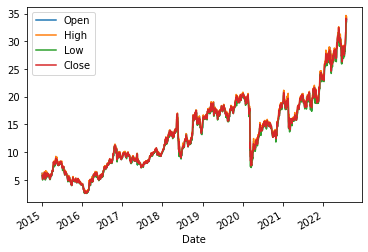

In [13]:
df[['Open', 'High', 'Low', 'Close']].plot()

<h3>Análise Descritiva</h3>

In [14]:
df.reset_index(inplace=True)

In [15]:
def expandirDataFrame(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['YearMonth'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))

    dayweek_map = {
        0 : 'Monday',
        1 : 'Tuesday',
        2 : 'Wednesday',
        3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday'
    }

    months_map = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }

    df['NameMonths'] = df['Month'].map(months_map)

    df['NameDayOfWeek'] = df['DayOfWeek'].map(dayweek_map)

    return df

In [16]:
df = expandirDataFrame(df)

In [17]:
def exibirTimeSeries(df, x = 'columnX', y = 'columnY', title = 'Title Default', width = 1000, height = 400, xlabel='xlabel', ylabel='ylabel'):
    fig = px.line(df, x = x, y = y)

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [18]:
def exibirBarPlot(df, x = 'columnX', y = 'columnY', title = 'Title Default', width = 1000, height = 400, xlabel='xlabel', ylabel='ylabel'):
    fig = px.bar(df, x = x, y = y)

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Year,Month,Day,Week,DayOfWeek,YearMonth,NameMonths,NameDayOfWeek
0,2015-01-02,6.178822,6.178822,5.782982,5.789166,49559500,0.0,0,PETR4.SA,2015,1,2,1,4,2015-01-01,January,Friday
1,2015-01-05,5.653096,5.684020,5.275810,5.294365,78385100,0.0,0,PETR4.SA,2015,1,5,2,0,2015-01-01,January,Monday
2,2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA,2015,1,6,2,1,2015-01-01,January,Tuesday
3,2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA,2015,1,7,2,2,2015-01-01,January,Wednesday
4,2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA,2015,1,8,2,3,2015-01-01,January,Thursday


In [20]:
px.line(x=df['Date'], y=df['Close'])

**Volume**

In [21]:
df_volume = df.groupby(['Year'], as_index=False)['Volume'].sum()

exibirTimeSeries(df_volume, 'Year', 'Volume', title='Volume de transações ao longo dos anos', ylabel='Volume', xlabel='Anos')

In [22]:
df_volume = df.groupby(['YearMonth'], as_index=False)['Volume'].sum()


exibirTimeSeries(df_volume, 'YearMonth', 'Volume', title='Volume de transações ao longo dos anos e meses', ylabel='Volume', xlabel='Anos e Meses')

In [23]:
df_volume = df.groupby(['NameMonths', 'Month'], as_index=False)['Volume'].sum().sort_values(by='Month')

exibirBarPlot(df_volume, 'NameMonths', 'Volume', title='Quantidade de Transações por Meses', ylabel='Volume', xlabel='Meses')

In [24]:
df_volume = df.groupby(['Week'], as_index=False)['Volume'].sum()

exibirBarPlot(df_volume, 'Week', 'Volume', title='Quantidade de Transações por Semanas do Ano', ylabel='Volume', xlabel='Semanas do Ano')

In [25]:
df_volume = df.groupby(['Day'], as_index=False)['Volume'].sum()

exibirBarPlot(df_volume, 'Day', 'Volume', title='Quantidade de Transações por Dias do Mês', ylabel='Volume', xlabel='Dias do Mês')

In [26]:
df_volume = df.groupby(['Day', 'NameMonths'], as_index=False)['Volume'].sum()

df_volume.sort_values(by=['Volume'], ascending=False)[0:15]

,Day,NameMonths,Volume
252,22,February,770615700
101,9,March,679716300
197,17,March,669502100
113,10,March,650877200
210,18,May,621757600
264,23,February,603203400
29,3,March,595204500
280,24,May,592630800
5,1,June,569888100
209,18,March,567238800


In [27]:
df_volume = df.groupby(['NameDayOfWeek', 'DayOfWeek'], as_index=False)['Volume'].sum().sort_values(by='DayOfWeek')

exibirBarPlot(df_volume, 'NameDayOfWeek', 'Volume', title='Quantidade de Transações por Dias da Semana', ylabel='Volume', xlabel='Dias da Semana')

**Rentabilidade**

In [28]:
#Rentabilidade é preço atual/ preço anterior * 100 - 100
df[['Rentability']] = df[['Close']] / df[['Close']].shift() * 100 - 100

print('Rentabilidade Total no Período: {}'.format(round(df['Rentability'].sum(), 3)))
print('Rentabilidade Média no Período: {}'.format(round(df['Rentability'].mean(), 3)))

Rentabilidade Total no Período: 275.391
Rentabilidade Média no Período: 0.146


In [29]:
df_volume = df.groupby(['Year'], as_index=False)['Rentability'].mean()


exibirTimeSeries(df_volume, 'Year', 'Rentability', title='Rentabilidade em média ao longo dos Anos', ylabel='Média', xlabel='Anos')

In [30]:
df_volume = df.groupby(['YearMonth'], as_index=False)['Rentability'].mean()

exibirTimeSeries(df_volume, 'YearMonth', 'Rentability', title='Rentabilidade em média ao longo dos Anos e Meses', ylabel='Média', xlabel='Anos')

In [31]:
df_volume = df.groupby(['Date'], as_index=False)['Rentability'].mean()

exibirTimeSeries(df_volume, 'Date', 'Rentability', title='Rentabilidade em média ao longo de todo o período', ylabel='Média', xlabel='Anos')

In [32]:
df_volume = df.groupby(['NameMonths', 'Month'], as_index=False)['Rentability'].mean().sort_values(by='Month')

exibirBarPlot(df_volume, 'NameMonths', 'Rentability', title='Rentabilidade em média ao longo dos meses', ylabel='Média', xlabel='Anos')

<h3>Análise de Séries Temporais</h3>

In [33]:
exibirTimeSeries(df, x=df['Date'], y=df['Close'], title='Série Temporal do Valor de Fechamento', xlabel='Período', ylabel='Valor')

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

* Sazonalidade - o fenômeno se repete em períodos fixos.
* Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico:

O Skewness do conjunto é: 0.5932555440553228


<AxesSubplot:xlabel='Close', ylabel='Count'>

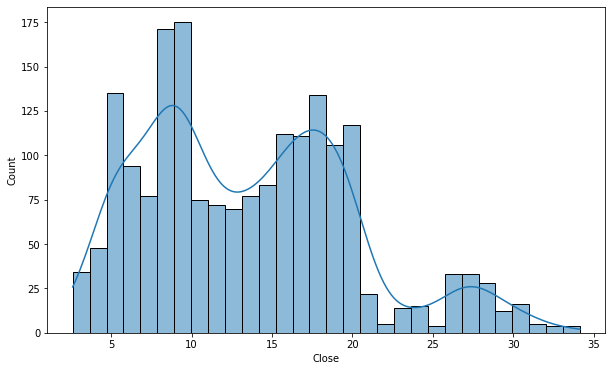

In [34]:
print('O Skewness do conjunto é: {}'.format(df['Close'].skew()))
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=30)

Análise:

* A distribuição não é perfeitamente gaussiana (distribuição normal).
* A distribuição está inclinada para a esquerda.
* As transformações podem ser úteis antes da modelagem.

Vamos agora criar Box Plots para cada ano da série.

<AxesSubplot:xlabel='Year', ylabel='Close'>

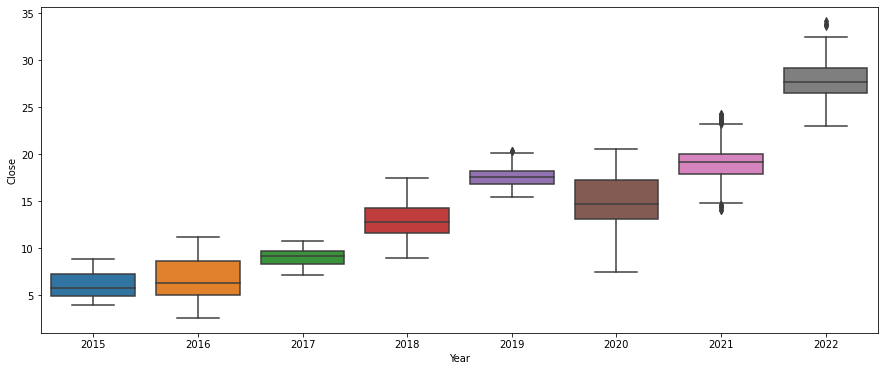

In [35]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada ano usando o Seaborn
sns.boxplot(df['Year'], df['Close'], ax = ax)

Análise:
* Valores medianos ao longo dos anos confirmam uma tendência ascendente.
* Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

<h3>Séries Temporais Aditivas e Multiplicativas</h3>

Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação na série pode ser expressa como uma soma ou um produto dos componentes:

* **Séries temporais aditivas**: Valor = Nível Base + Tendência + Sazonalidade + Erro
* **Séries temporais multiplicativas**: Valor = Nível Base x Tendência x Sazonalidade x Erro

<h3>Descomposição da Série Temporal</h3>

- Podemos usar os modelos estatísticos para realizar uma decomposição dessa série cronológica.
- A decomposição de séries temporais é uma tarefa estatística que desconstrói uma série temporal em vários componentes, cada um representando uma das categorias de padrões.
- Com os modelos de estatísticas, poderemos ver a tendência, os componentes sazonais e residuais de nossos dados.

Você pode fazer uma decomposição clássica de uma série temporal, considerando a série como uma combinação aditiva ou multiplicativa do nível base, tendência, índice sazonal e residual.

A função seasonal_decompose do pacote Statsmodels em Python implementa isso convenientemente. Aqui o site do Statsmodels com bastante documentação: https://www.statsmodels.org/

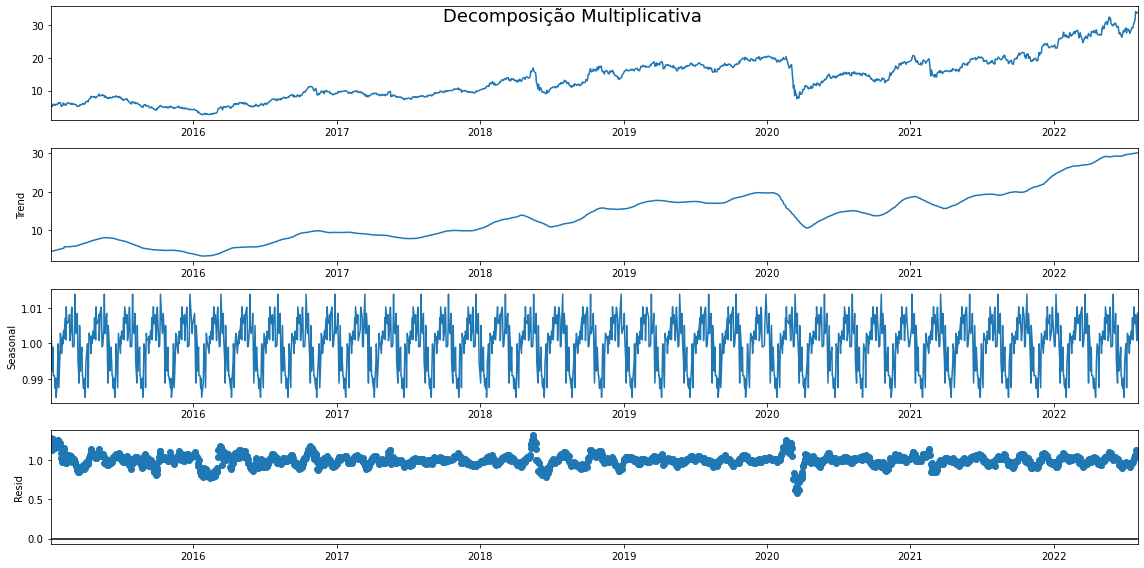

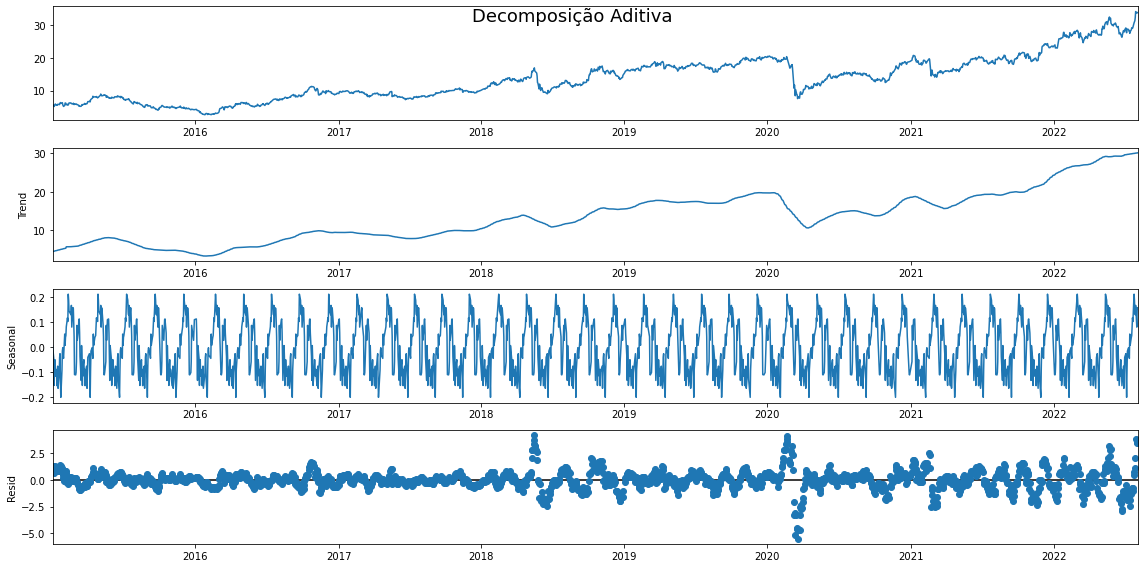

In [36]:
df.index = df['Date']

# Multiplicative Decomposition 
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df[['Close']], period=50, model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(df[['Close']], period=50, model = 'aditive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,8)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 18)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 18)
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

**1.** A primeira linha do gráfico mostra os dados ;<br/>
**2.** A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, o valor de fechamento `Close` tende a crescer ao longo do tempo;<br/>
**3.** A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda;<br/>
**4.** A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

In [37]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

In [38]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
Date,,,,
2015-01-02,1.005044,4.506654,1.278135,5.789166
2015-01-05,0.998914,4.543424,1.166547,5.294365
2015-01-06,0.992211,4.580194,1.126893,5.121185
2015-01-07,0.996663,4.616964,1.165344,5.362401
2015-01-08,0.998929,4.653734,1.228020,5.708761


<h3>Estacionaridade</h3>

Uma suposição comum em muitas técnicas de séries temporais é que os dados sejam estacionários. Um processo estacionário tem a propriedade de que a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo. 

Estacionariedade pode ser definida em termos matemáticos precisos, mas para os nossos propósitos queremos dizer uma série parecida com um plano liso, sem tendência, variância constante no decorrer do tempo, um estrutura de autocorrelação constante no decorrer do tempo e nenhuma flutuação periódica (sazonalidadae).

**Vejamos**:

* Uma série temporal é considerada estacionária se suas propriedades estatísticas, como média e variância, permanecerem constantes ao longo do tempo.

* A maioria dos modelos de séries temporais trabalha com o pressuposto de que a série temporal é estacionária. A principal razão para isso é que existem muitas maneiras pelas quais uma série pode ser não estacionária, mas apenas uma para estacionariedade.

* Intuitivamente, podemos dizer que, se uma série temporal tem um comportamento específico ao longo do tempo, há uma probabilidade muito alta de que ela siga o mesmo no futuro.

* Além disso, as teorias relacionadas às séries estacionárias são mais maduras e mais fáceis de implementar em comparação às séries não estacionárias.

A estacionariedade é um importante conceito na modelagem de séries temporais e é caracterizada por uma variável que se comporta de forma aleatória ao longo do tempo ao redor de uma média constante.

Basicamente, séries temporais que possuem tendência e/ou sazonalidade não são estacionárias e é necessário o uso de técnicas adequadas a tal situação.

**Verificando a Estacionariedade**

Podemos verificar a estacionariedade de uma série temporal da seguinte forma:

* **Plot das Rolling Statistics (Estatísticas Móveis)**: Podemos criar um plot da média móvel e variância móvel (ou desvio padrão, que é a raiz quadrada da variância) e ver se variam com o tempo. A média / variância móvel é, para qualquer instante 't', a média / variância do último ano, ou seja, os últimos 12 meses.
* **Autocorrelação com Gráficos ACF e PACF**: Se a série temporal for estacionária, os gráficos ACF / PACF (gráficos de autocorrelação da série) mostrarão um padrão específico.
* **Teste Dickey-Fuller**: Este é um dos testes estatísticos para verificar a estacionariedade. Aqui, a hipótese nula é que a série temporal não é estacionária. Os resultados do teste incluem uma estatística de teste e alguns valores críticos para os níveis de confiança das diferenças. Se a 'Estatística de teste' for menor que o 'valor crítico', podemos rejeitar a hipótese nula e dizer que a série é estacionária.

---

**O Que São Lags (Defasagens ou Atrasos)?**<br/>
Uma maneira de analisar os dados de séries temporais é plotar cada observação contra outra observação que ocorreu algum tempo antes. Por exemplo, você pode plotar `yt` contra `yt-1.` Nesse caso, `yt-1` é o atraso da série, o lag.

As correlações associadas aos gráficos de atraso formam o que é chamado de "função de autocorrelação". A autocorrelação é quase a mesma que a correlação de Pearson (que usamos em modelos de Regressão). No entanto, a autocorrelação é a correlação de uma série temporal com uma cópia atrasada (lag, atraso ou defasagem) de si mesma.

A `função de autocorrelação (ACF) `é o principal método na análise de séries temporais para quantificar o nível de correlação entre uma série e seus atrasos. Esse método é bastante semelhante (matematicamente e logicamente) ao coeficiente de correlação de Pearson.

---
**Autocorrelação**<br/>
Os modelos estatísticos mais conhecidos e utilizados, como a Regressão Linear e o Regressão Logística, são adequados na modelagem de variáveis em que as observações são independentes. Em uma série temporal, não há como desconsiderar a estrutura de dependência das observações.

Por exemplo, a quantidade vendida de sorvete em janeiro pode estar relacionada à quantidade vendida em dezembro, que por sua vez pode estar relacionada com a de novembro e assim por diante. Dessa forma, a utilização desses modelos pode gerar resultados enviesados e que não refletem a realidade.

A autocorrelação é definida como uma observação num determinado instante está relacionada às observações passadas.

As observações podem estar autocorrelacionadas em diversas ordens. A autocorrelação de primeira ordem caracteriza séries onde uma observação está correlacionada com a observação imediatamente anterior (janeiro e dezembro, por exemplo). A autocorrelação de segunda ordem caracteriza séries temporais onde uma observação está correlacionada com as observações a 2 unidades de tempo no passado (janeiro e novembro, por exemplo).

A identificação da autocorrelação é feita através da Função de Autocorrelação (`ACF – Autocorrelation Function`), mostrada abaixo. Além disso, testes como o de Durbin Watson auxiliam na identificação da autocorrelação de primeira ordem.

A autocorrelação é uma ferramenta matemática para encontrar padrões de repetição, como a presença de um sinal periódico obscurecidos pelo ruído. Um diagrama de autocorrelações apresenta os valores de autocorrelação de uma amostra versus o intervalo de tempo em que foi calculado. Autocorrelações devem ser próximas de zero para aleatoriedade. A ocorrência de não estacionariedade é denotada pela lenta queda da `ACF` nos primeiros lags da série. Isto significa que a série deve ser diferenciada, e que um modelo `ARIMA` ou `SARIMA` deve ser aplicado.

Antes de iniciar qualquer modelagem preditiva é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

* Média constante
* Variância constante
* Autocorrelacionada

---

**Plot das Rolling Statistics (Estatísticas Móveis)**

In [39]:
df_month = df.groupby(['YearMonth'], as_index=False)['Close'].sum()


fig = go.Figure()

fig.add_traces(go.Line(x=df_month['YearMonth'], y=df_month['Close'], name='Original'))

# Determinando estatísticas móveis
rolmean = df_month['Close'].rolling(window = 12).mean()
rolstd = df_month['Close'].rolling(window = 12).std()

fig.add_traces(go.Line(x=df_month['YearMonth'], y=rolmean, name='Média Móvel'))
fig.add_traces(go.Line(x=df_month['YearMonth'], y=rolstd, name='Desvio Padrão'))


fig.update_layout(
        title='<span>Plot das Rolling Statistics (Estatísticas Móveis)</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

Análise:

* Observamos que a média móvel e o desvio padrão não são constantes em relação ao tempo (tendência crescente).
* A série cronológica não é, portanto, estacionária.

**Plots ACF e PACF**

Vamos criar os gráficos da função de autocorrelação (ACF) e da função de autocorrelação parcial (PACF).

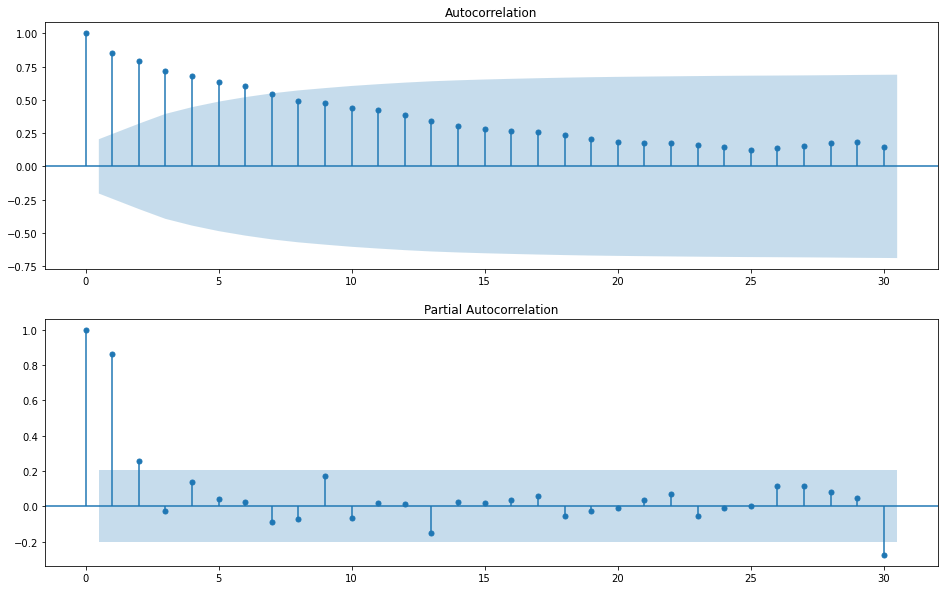

In [40]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(df_month['Close'], ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(df_month['Close'], ax = plt.gca(), lags = 30)
plt.show()

*Interpretação dos Gráficos:*

No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem.

A área sombreada em azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada em azul. Nesses casos, a autocorrelação é diferente de zero, indicando que a série não é aleatória – conforme o esperado.

Algumas barras verticais estão dentro do limite da área sombreada em azul, Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

Em termos simples: a área sombreada em azul aponta a significância. Se ultrapassa é porque tem correlação.

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada em azul indica se o nível de correlação entre a série e cada atraso é significativo ou não.

Testando a hipótese nula de que a correlação do atraso com a série é igual a zero, podemos rejeitá-la sempre que o nível de correlação estiver acima ou abaixo da área sombreada em azul com um nível de significância de 5%.

Caso contrário, sempre que a correlação estiver dentro da área sombreada em azul, deixamos de rejeitar a hipótese nula e, portanto, podemos ignorar esses atrasos (ou assumir que não há correlação significativa entre eles e a série).

O PACF é apenas uma visualização parcial do ACF.

*Análise:*

* Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos. Não é o caso em nossos gráficos. A queda lenda (redução do tamanho das barras) indica que essa série não é estacionária).
* Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.
* Intervalos de confiança são desenhados na área azul clara. Por padrão, isso é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.
* Teremos que transformar essa série em estacionária antes de criar um modelo preditivo.

---

**Teste Dickey-Fuller aumentado**

* A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série `y (t-1)` não fornecerá informações relevantes na previsão da mudança em `y (t)`.
* Hipótese nula: a série temporal não é estacionária.
* Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

In [41]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(df['Close'], autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.236754
Valor-p                            0.933996
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64


Análise:

* O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária.

Abaixo irei criar uma função que executa o teste de estacionaridade e pode ser aplicada a qualquer série para testar se ela é ou não estacionária.

Se a série não for estacionária, teremos que aplicar transformações antes da modelagem.

In [42]:
def testaEstacionaridade(df, column):
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(df[column], autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

In [43]:
testaEstacionaridade(df, column='Close')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.236754
Valor-p                            0.933996
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


**Tipos de Estacionariedade**

O que fazer agora que identificamos que a série é não estacionária?<br/>
R: Teremos que transformar esta série em uma série estacionária, mas antes vamos enteder mais sobre séries estacionárias e seus tipos de estacionaridades. Existem três tipos de estacionariedade, vejamos cada uma delas:

**Estacionaridade Estrita**: Uma série estacionária estrita satisfaz a definição matemática de um processo estacionário. Para uma série estacionária estrita, a média, variância e covariância não são funções do tempo. O objetivo é converter uma série não estacionária em uma série estacionária estrita para fazer previsões.

**Estacionaridade de Tendência**: Uma série que não possui raiz unitária, mas exibe uma tendência, é chamada de série estacionária de tendência. Uma vez removida a tendência, a série resultante será estritamente estacionária. O teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin) classifica uma série como estacionária na ausência de raiz da unidade. Isso significa que a série pode ser estacionária estrita ou estacionária de tendência.

**Estacionaridade Diferencial**: Uma série temporal que pode ser tornada estritamente estacionária pela diferenciação é do tipo estacionária diferencial. O teste ADF (Augmented Dickey Fuller) também é conhecido como teste de estacionariedade diferencial.

É sempre melhor aplicar os dois testes, para ter certeza de que a série é realmente estacionária.

---

**Transformando uma Série Não Estacionária em Série Estacionária**

Se a série temporal não for estacionária, podemos frequentemente transformá-la em estacionária com uma das técnicas seguintes (ou combinações delas).

**1.** Transformações de potência. Aplicamos uma transformação matemática aos dados visando remover padrões e transformar a série em estacionária. As transformações de potência mais comuns são a de `log`, `raiz` quadrada e `Box-Cox`.<br/>

**2.** Podemos diferenciar os dados. Isto é, dada a série Yt, criamos a nova série: `Y(i) = Y(i) - Y(i-1)` <br/>
Os dados diferenciados conterão um ponto a menos que os dados originais. Embora você possa diferenciar os dados mais que uma vez, uma diferenciação é geralmente suficiente.

**3.** Se os dados tiverem uma tendência, podemos ajustar algum tipo de curva aos dados e depois então modelar os resíduos daquele ajuste. Desde que o propósito do ajuste é simplesmente remover tendências de longo prazo, um ajuste simples, tal como uma linha reta, é tipicamente usado. <br/>

**4.** Para dados negativos, você pode adicionar uma constante adequada para tornar todos os dados positivos antes de aplicar a transformação. Esta constante pode então ser subtraída do modelo para obter valores previstos (i.e., ajustados) e previsões para pontos futuros. <br/>

As técnicas acima são dirigidas para gerarem séries com localizações e escala constantes. 

**Portanto,** As principais técnicas para aplicar estacionaridade são:

**Transformação**

- Transformação de log
- Transformação exponencial
- Transformação Box Cox
- Transformação da raiz quadrada

**Remoção de Tendência**

- Smoothing (alisamento ou suavização) é usada para remover a tendência da série, calculando médias contínuas ao longo das janelas de tempo.

Mas as técnicas acima não funcionam em todos os casos, principalmente nos de alta sazonalidade. Para esses casos, outras técnicas podem ser usadas:

**Diferenciação**

- Nesta técnica, calculamos a diferença da observação em um determinado instante com a do instante anterior.

**Decomposição**

- Nesta abordagem, a tendência e a sazonalidade são modeladas separadamente e a parte restante da série é retornada.

---

<h3>Transformações</h3>

In [44]:
df_transformed = df[['Close']].copy()
df_transformed.reset_index(inplace=True)

In [45]:
df_transformed.head()

,Date,Close
0,2015-01-02,5.789166
1,2015-01-05,5.294365
2,2015-01-06,5.121185
3,2015-01-07,5.362401
4,2015-01-08,5.708761




Vamos começar pela transformação de log no nosso conjunto de dados.

**Transformação de Log**

Séries temporais com uma distribuição exponencial podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. Você com certeza lembra do que é logaritmo pois estudou isso no ensino fundamental. :-)

As transformações de log são populares em dados de séries temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito. Por exemplo: serie_transformada_y = log(constante + x)

In [46]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
df_transformed['CloseLog'] = np.log(df_transformed['Close'])
df_transformed.head()

,Date,Close,CloseLog
0,2015-01-02,5.789166,1.755988
1,2015-01-05,5.294365,1.666643
2,2015-01-06,5.121185,1.633386
3,2015-01-07,5.362401,1.679412
4,2015-01-08,5.708761,1.742002


In [47]:
exibirTimeSeries(df_transformed, x='Date', y='Close', title='Série Temporal Normal', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseLog', title='Série Temporal com Transformação de Log', xlabel='Período', ylabel='Valores')

O Skewness da Série Normal é de: 0.5932555440553228
O Skewness da Série Log é de: -0.43015530629325127


<AxesSubplot:xlabel='CloseLog', ylabel='Count'>

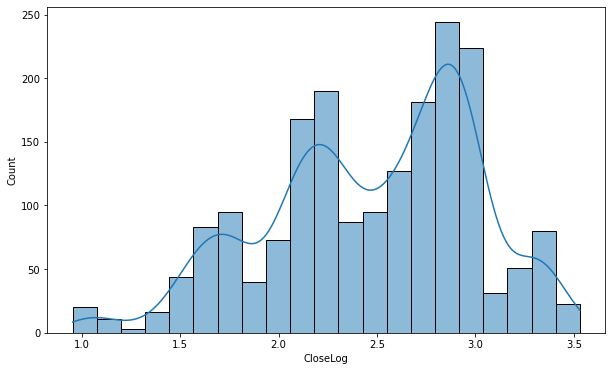

In [48]:
print('O Skewness da Série Normal é de: {}'.format(df_transformed['Close'].skew()))
print('O Skewness da Série Log é de: {}'.format(df_transformed['CloseLog'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseLog'], kde=True)

In [49]:
testaEstacionaridade(df_transformed, 'CloseLog')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -1.191441
Valor-p                            0.677267
Número de Lags Consideradas        7.000000
Número de Observações Usadas    1878.000000
Valor Crítico (1%)                -3.433837
Valor Crítico (5%)                -2.863080
Valor Crítico (10%)               -2.567590
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Análise:

* Embora a Série pareça estar visualmente mais linear, vemos que a transformação log não mudou muita coisa;
* Pelo histograma percebemos que a transformação log se aproximou mais de zero, mas não foi um valor considerável.

---

**Diferenciação**

In [50]:
# Aplicando Diferenciação - Y(i) = Y(i) - Y(i-1)
# Gravamos a série diferenciada no próprio dataset
df_transformed['CloseDiff'] = df_transformed['Close'] - df_transformed['Close'].shift(1)
df_transformed['CloseDiffLog'] = df_transformed['CloseLog'] - df_transformed['CloseLog'].shift(1)
df_transformed.head()

,Date,Close,CloseLog,CloseDiff,CloseDiffLog
0,2015-01-02,5.789166,1.755988,NaN,NaN
1,2015-01-05,5.294365,1.666643,-0.494801,-0.089345
2,2015-01-06,5.121185,1.633386,-0.173181,-0.033257
3,2015-01-07,5.362401,1.679412,0.241216,0.046026
4,2015-01-08,5.708761,1.742002,0.346361,0.062590


In [51]:
exibirTimeSeries(df_transformed, x='Date', y='Close', title='Série Temporal Normal', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseDiff', title='Série Temporal com Transformação de Diferenciação', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseDiffLog', title='Série Temporal com Transformação de Log e de Diferenciação', xlabel='Período', ylabel='Valores')

O Skewness da Série Normal é de: 0.5932555440553228
O Skewness da Série Log é de: -0.43015530629325127
O Skewness da Série Dif é de: -1.3688540003376721
O Skewness da Série Dif Log é de: -1.0898508833097587


<AxesSubplot:xlabel='CloseDiffLog', ylabel='Count'>

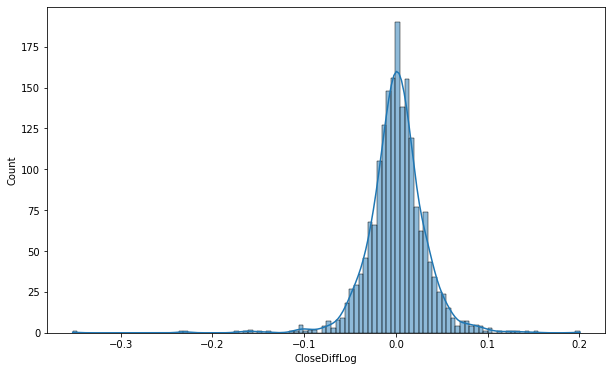

In [52]:
print('O Skewness da Série Normal é de: {}'.format(df_transformed['Close'].skew()))
print('O Skewness da Série Log é de: {}'.format(df_transformed['CloseLog'].skew()))
print('O Skewness da Série Dif é de: {}'.format(df_transformed['CloseDiff'].skew()))
print('O Skewness da Série Dif Log é de: {}'.format(df_transformed['CloseDiffLog'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseDiffLog'], kde=True)

In [53]:
df_transformed.dropna(inplace=True)

In [54]:
testaEstacionaridade(df_transformed, 'CloseDiff')
testaEstacionaridade(df_transformed, 'CloseDiffLog')


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.289582e+01
Valor-p                         4.351117e-24
Número de Lags Consideradas     7.000000e+00
Número de Observações Usadas    1.877000e+03
Valor Crítico (1%)             -3.433839e+00
Valor Crítico (5%)             -2.863081e+00
Valor Crítico (10%)            -2.567590e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.

Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.441289e+01
Valor-p                         8.149080e-27
Número de Lags Consideradas     6.000000e+00
Número de Observações Usadas    1.878000e+03
Valor Crítico (1%)             -3.433837e+00
Valor Crítico (5%)             -2.863080e+00
Valor Crítico (10%)            -2.567590e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente 

Análise:
* Visualizando o gráfico vemos que a Série perdeu o componente tendência, isso é bom, porém a distribuição se distanciou de uma distribuição normal e ficou pior do que antes.

**Transformação de Raiz Quadrada**

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que uma companhia mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada para reduzir a tendência de crescimento seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

O exemplo abaixo executa uma raiz quadrada do conjunto de dados e plota os resultados.

In [55]:
# Transformação de Raiz Quadrada com np.sqrt()
df_transformed['CloseSqrt'] = np.sqrt(df_transformed['Close'])

In [56]:
exibirTimeSeries(df_transformed, x='Date', y='CloseSqrt', title='Série Temporal com Transformação de Raiz Quadrada', xlabel='Período', ylabel='Valores')

O Skewness da Série Sqrt é de: 0.09361737285800431


<AxesSubplot:xlabel='CloseSqrt', ylabel='Count'>

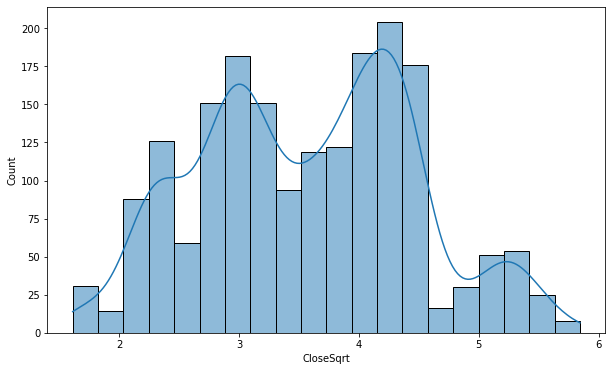

In [57]:
print('O Skewness da Série Sqrt é de: {}'.format(df_transformed['CloseSqrt'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseSqrt'], kde=True)

In [58]:
testaEstacionaridade(df_transformed, 'CloseSqrt')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.725693
Valor-p                            0.839982
Número de Lags Consideradas        7.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Análise:
* Podemos ver qua a série manteve o componente tendência, mas a distribuição ficou mais normal segundo a métrica `skewness`. Contudo, o histograma possui dois picos.

--- 

**Transformação Box-Cox**

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. Pode ser pensado como uma ferramenta elétrica para resolver mudanças baseadas em energia em suas séries temporais. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- **lambda = -1.** é uma transformação recíproca.
- **lambda = -0.5** é uma transformação de raiz quadrada recíproca.
- **lambda = 0.0** é uma transformação de log.
- **lambda = 0.5** é uma transformação de raiz quadrada.
- **lambda = 1.0** não é transformação.

Podemos definir o parâmetro lambda como None (o padrão) e deixar a função encontrar um valor ajustado estatisticamente.

In [62]:
# Aplicando Transformação Box-Cox
#df_transformed['CloseBoxCox'] = boxcox(df_transformed['Close'], lmbda = 0.0)
df_transformed['CloseBoxCox'], lambda_value = boxcox(df_transformed['Close'])

print(f'O valor escolhido para lambda: {lambda_value}')
df_transformed.head()

O valor escolhido para lambda: 0.36325933050146214


,Date,Close,CloseLog,CloseDiff,CloseDiffLog,CloseSqrt,CloseBoxCox
1,2015-01-05,5.294365,1.666643,-0.494801,-0.089345,2.300949,2.290452
2,2015-01-06,5.121185,1.633386,-0.173181,-0.033257,2.263003,2.229891
3,2015-01-07,5.362401,1.679412,0.241216,0.046026,2.315686,2.313899
4,2015-01-08,5.708761,1.742002,0.346361,0.062590,2.389301,2.430419
5,2015-01-09,5.881941,1.771887,0.173180,0.029885,2.425271,2.486995


In [63]:
exibirTimeSeries(df_transformed, x='Date', y='CloseBoxCox', title=f'Série Temporal com Transformação BoxCox e valor Lambda: {lambda_value}', xlabel='Período', ylabel='Valores')

O Skewness da Série BoxCox é de: -0.045602497511331413


<AxesSubplot:xlabel='CloseBoxCox', ylabel='Count'>

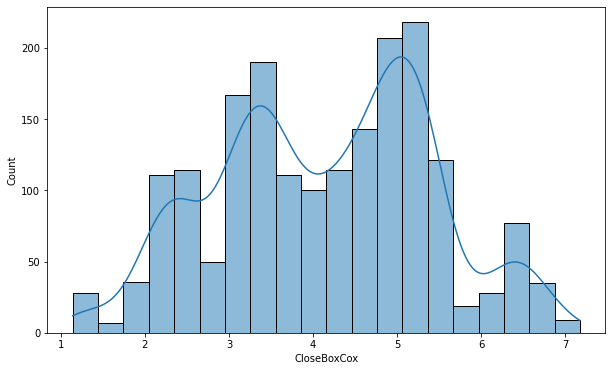

In [64]:
print('O Skewness da Série BoxCox é de: {}'.format(df_transformed['CloseBoxCox'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseBoxCox'], kde=True)

Análise:

A execução do exemplo gerou o valor lambda de 0.362. Podemos ver que isso está mais próximo de um valor lambda de 0.5, resultando em uma tendência de transformação de raiz quadrada.

In [65]:
testaEstacionaridade(df_transformed, 'CloseBoxCox')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.867964
Valor-p                            0.798339
Número de Lags Consideradas        7.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [66]:
df_transformed['CloseBoxCoxDiff'] = df_transformed['CloseBoxCox'] - df_transformed['CloseBoxCox'].shift(1)
df_transformed.head()

,Date,Close,CloseLog,CloseDiff,CloseDiffLog,CloseSqrt,CloseBoxCox,CloseBoxCoxDiff
1,2015-01-05,5.294365,1.666643,-0.494801,-0.089345,2.300949,2.290452,NaN
2,2015-01-06,5.121185,1.633386,-0.173181,-0.033257,2.263003,2.229891,-0.060562
3,2015-01-07,5.362401,1.679412,0.241216,0.046026,2.315686,2.313899,0.084009
4,2015-01-08,5.708761,1.742002,0.346361,0.062590,2.389301,2.430419,0.116520
5,2015-01-09,5.881941,1.771887,0.173180,0.029885,2.425271,2.486995,0.056576


In [67]:
df_transformed.dropna(inplace=True)
testaEstacionaridade(df_transformed, 'CloseBoxCoxDiff')


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.425202e+01
Valor-p                         1.475497e-26
Número de Lags Consideradas     6.000000e+00
Número de Observações Usadas    1.877000e+03
Valor Crítico (1%)             -3.433839e+00
Valor Crítico (5%)             -2.863081e+00
Valor Crítico (10%)            -2.567590e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


---

<h3>Suavização(Smoothing)</h3>

**Smoothing**

Smoothing (Suavização ou Alisamento) em séries temporais é um conjunto de métodos para suavizar séries temporais eliminando "saltos". Existem várias maneiras de fazer isso. Talvez o mais fácil seja calcular a média móvel simples (Simple Moving Average).

A suavização é basicamente uma técnica usada para ver a tendência de longo prazo nos dados, diminuindo os efeitos dos componentes periódicos / sazonais dos dados. Basicamente, usamos suavização quando queremos remover as flutuações nos dados e focamos apenas em preservar as tendências de longo prazo.

A suavização é uma técnica aplicada às séries temporais para remover a variação granular entre as etapas do tempo.

O objetivo de suavizar é remover o ruído e expor melhor o sinal dos processos. As médias móveis são um tipo simples e comum de suavização usado na análise de séries temporais e na previsão de séries temporais.

O cálculo de uma média móvel envolve a criação de uma nova série em que os valores são compostos da média de observações brutas na série temporal original. 

A suavização da média móvel (Moving Average Smoothing) é uma técnica eficaz na previsão de séries temporais também, ou seja, pode ser usado para preparação de dados, engenharia de recursos e até diretamente para fazer previsões.

Uma média móvel requer que você especifique um tamanho de janela chamado largura da janela. Isso define o número de observações brutas usadas para calcular o valor da média móvel.

A parte "móvel" na média móvel refere-se ao fato de que a janela definida pela largura da janela é deslizada ao longo da série temporal para calcular os valores médios na nova série.

Vejamos como isso funciona.

In [68]:
df_smoothing = df_transformed[['Date', 'CloseBoxCox']].copy()
df_smoothing.head()

,Date,CloseBoxCox
2,2015-01-06,2.229891
3,2015-01-07,2.313899
4,2015-01-08,2.430419
5,2015-01-09,2.486995
6,2015-01-12,2.349765


**Média Móvel Simples**

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [69]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
df_smoothing['CloseBoxCox'].mean()

4.14262018424203

In [70]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_smoothing_cp = df_smoothing.copy()

In [71]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
df_smoothing_cp['CloseSmoothing'] = df_smoothing_cp['CloseBoxCox'].rolling(window = 7).mean()

In [72]:
df_smoothing_cp.head(15)

,Date,CloseBoxCox,CloseSmoothing
2,2015-01-06,2.229891,NaN
3,2015-01-07,2.313899,NaN
4,2015-01-08,2.430419,NaN
5,2015-01-09,2.486995,NaN
6,2015-01-12,2.349765,NaN
7,2015-01-13,2.401721,NaN
8,2015-01-14,2.364406,2.368157
9,2015-01-15,2.446694,2.399129
10,2015-01-16,2.472951,2.421850
11,2015-01-19,2.418154,2.420098


Agora temos duas colunas e alguns valores NaN na coluna das médias móveis. Isso é normal e esperado, afinal, calculamos a média de 12 valores consecutivos "deslizando" a janela pela série e para alguns valores (os primeiros da série) não teremos como calcular a média dos 12 valores anteriores e assim eles ficam como NaN. Ou seja, perdemos registros da série ao aplicar esta técnica de suavização.

In [73]:
df_smoothing_cp.dropna(inplace=True)

In [74]:
fig = go.Figure()

fig.add_traces(go.Line(x=df['Date'], y=df['Close'], name='Original'))
fig.add_traces(go.Line(x=df_smoothing_cp['Date'], y=df_smoothing_cp['CloseBoxCox'], name='Transformação Box Cox'))
fig.add_traces(go.Line(x=df_smoothing_cp['Date'], y=df_smoothing_cp['CloseSmoothing'], name='Transformação Smoothing'))


fig.update_layout(
        title='<span>Plot das Transformações</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

In [75]:
testaEstacionaridade(df=df_smoothing_cp, column='CloseSmoothing')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.538235
Valor-p                            0.884337
Número de Lags Consideradas       25.000000
Número de Observações Usadas    1852.000000
Valor Crítico (1%)                -3.433886
Valor Crítico (5%)                -2.863102
Valor Crítico (10%)               -2.567601
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


**Média Móvel Ponderada Exponencial**

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

In [76]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
df_smoothing['CloseExp'] = df_smoothing['CloseBoxCox'].ewm(alpha = 0.5, adjust = True).mean()
df_smoothing.head()

,Date,CloseBoxCox,CloseExp
2,2015-01-06,2.229891,2.229891
3,2015-01-07,2.313899,2.285896
4,2015-01-08,2.430419,2.368481
5,2015-01-09,2.486995,2.431688
6,2015-01-12,2.349765,2.389405


In [77]:

fig = go.Figure()

fig.add_traces(go.Line(x=df['Date'], y=df['Close'], name='Original'))
fig.add_traces(go.Line(x=df_smoothing['Date'], y=df_smoothing['CloseBoxCox'], name='Transformação Box Cox'))
fig.add_traces(go.Line(x=df_smoothing['Date'], y=df_smoothing['CloseExp'], name='Transformação Exponencial'))


fig.update_layout(
        title='<span>Plot das Transformações</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

In [78]:
testaEstacionaridade(df=df_smoothing, column='CloseExp')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.629700
Valor-p                            0.864129
Número de Lags Consideradas       15.000000
Número de Observações Usadas    1868.000000
Valor Crítico (1%)                -3.433856
Valor Crítico (5%)                -2.863088
Valor Crítico (10%)               -2.567594
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Análise:
* Com os métodos de Smoothing não conseguimos tornar a série estacionária. Portanto, iremos continuar utilizando a série obtida com os métodos de BoxCox e Diferenciação.

---
<h2>PRÉ-PROCESSAMENTO DOS DADOS</h2>

---
<h2>MODELAGEM - FORECASTING</h2>

A partir de agora utilizaremos as previsões de séries temporais, uma habilidade valiosa e importante em praticamente qualquer área de negócio.

**Por que Forecasting é Importante?**

A previsão de séries temporais (chamado Forecasting) é uma área importante do aprendizado de máquina que geralmente é negligenciada.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos dados de séries temporais.

**O Tempo**

O tempo desempenha um papel básico, e muitas vezes irrelevante, nos conjuntos de dados que usamos em Machine Learning de forma tradicional (qualquer coisa que não seja série temporal).

São feitas previsões para novos dados quando o resultado real pode não ser conhecido até alguma data futura. O futuro está sendo previsto, mas todas as observações anteriores são quase sempre tratadas igualmente. Talvez com algumas dinâmicas temporais muito pequenas para superar a ideia de `desvio de conceito`, como usar apenas o último ano de observações em vez de todos os dados disponíveis.

Um conjunto de dados de séries temporais é diferente.

As séries temporais adicionam uma dependência explícita da ordem entre as observações: uma dimensão temporal.

Essa dimensão adicional é uma restrição e uma estrutura que fornece uma fonte de informações adicionais. E muito, muito valiosa.

**Descrevendo vs. Prevendo**

Temos objetivos diferentes, dependendo de estarmos interessados em entender um conjunto de dados ou fazer previsões.

A compreensão de um conjunto de dados, chamado análise de séries temporais, pode ajudar a fazer melhores previsões, mas não é necessária e pode resultar em um grande investimento técnico em tempo e experiência, não diretamente alinhados com o resultado desejado, que está prevendo o futuro.

Na modelagem descritiva ou análise de séries temporais, uma série temporal é modelada para determinar seus componentes em termos de padrões sazonais, tendências, relação a fatores externos e similares. Por outro lado, a previsão de séries temporais usa as informações em uma série temporal (talvez com informações adicionais) para prever valores futuros dessa série.

**Análise de Séries Temporais**

Ao usar estatísticas clássicas, a principal preocupação é a análise de séries temporais.

A análise de séries temporais envolve o desenvolvimento de modelos que melhor capturam ou descrevem uma série temporal observada para entender as causas. Este campo de estudo busca o "porquê" por trás de um conjunto de dados de séries temporais.

Isso geralmente envolve fazer suposições sobre a forma dos dados e decompor as séries temporais.

A qualidade de um modelo descritivo é determinada por quão bem ele descreve todos os dados disponíveis e a interpretação que fornece para melhor informar o domínio do problema.

O objetivo principal da análise de séries temporais é desenvolver modelos matemáticos que forneçam descrições plausíveis a partir de dados de amostra.

Isso é o que chamamos de Modelagem Estatística.

**Previsão de Séries Temporais**

Fazer previsões sobre o futuro é chamado de extrapolação no tratamento estatístico clássico de dados de séries temporais.

Os campos mais modernos se concentram no tópico e se referem a ele como previsão de séries temporais.

A previsão envolve ajustar os modelos aos dados históricos e usá-los para prever observações futuras.

Uma distinção importante na previsão é que o futuro está completamente indisponível e só deve ser estimado a partir do que já aconteceu.

O objetivo da análise de séries temporais é geralmente duplo: entender ou modelar os mecanismos estocásticos que dão origem a uma série observada e prever os valores futuros de uma série com base no histórico dessa série.

Isso é o que chamamos de Modelagem Preditiva.


---

<h3>Divisão em Treino e Teste</h3>

Para séries temporais devemos dividir os dados de treino e testes de maneira cronológica, afinal de contas, queremos prever diversos valores ao longo do período.

Para isso, irei pegar os dados inferiores a três meses para realizar o treinamento e os dados dos últimos três meses para testes. 

In [348]:
df_treino = df_transformed.loc[df_transformed['Date'] <= '2022-05-01', ['Date', 'CloseBoxCox']]
df_valid = df_transformed.loc[df_transformed['Date'] > '2022-05-01', ['Date', 'CloseBoxCox']]

df_treino.columns = ['Date', 'Close']
df_valid.columns = ['Date', 'Close']

df_treino.index = df_treino['Date'].values
df_valid.index = df_valid['Date'].values

df_treino.drop(columns=['Date'], inplace=True)
df_valid.drop(columns=['Date'], inplace=True)


df_treino['Close Transformed'] = df_treino['Close'].apply(lambda x: inv_boxcox(x, lambda_value))
df_valid['Close Transformed'] = df_valid['Close'].apply(lambda x: inv_boxcox(x, lambda_value))

In [349]:
fig = go.Figure()

fig.add_traces(go.Line(x=df_treino.index, y=df_treino['Close'], name='Dados de Treino'))
fig.add_traces(go.Line(x=df_valid.index, y=df_valid['Close'], name='Dados de Teste'))

fig.update_layout(
        title='<span>Plot dos dados divididos em Treino e Teste</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

<h3>Método Naive</h3>

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [356]:
# Criamos um array com os valores da variável target em treino
array_count_treino = np.asarray(df_treino['Close'])
array_count_treino

array([2.22989066, 2.31389921, 2.43041914, ..., 6.35868194, 6.38065703,
       6.38284957])

In [357]:
# Previsão

# Veja como o método é mesmo Naive
# Os dados reais (de treino) são usados como previsão para os dados de validação, 
# sem ajustá-los ou tentar estabelecer fatores causais.

# Sim, isso é o Método Naive!
df_valid['Pred Naive'] = array_count_treino[len(array_count_treino) - 1] 

In [358]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid.head()

,Close,Close Transformed,Pred Naive
2022-05-02,6.349866,26.902918,6.38285
2022-05-03,6.379561,27.145206,6.38285
2022-05-04,6.575452,28.778404,6.38285
2022-05-05,6.569109,28.724562,6.38285
2022-05-06,6.679047,29.666794,6.38285


In [359]:
def exibirResultados(df_treino, df_valid, colum): 
    # Define valor real e valor previsto
    y_true = df_valid['Close Transformed']
    y_pred = df_valid[colum]

    # Calcula o erro usando RMSE (Root Mean Squared Error)
    metrica_rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    print(f'O Resultado com a Métrica RMSE foi de: {metrica_rmse}')


    fig = go.Figure()

    fig.add_traces(go.Line(x=df_treino.index, y=df_treino['Close Transformed'], name='Dados de Treino'))
    fig.add_traces(go.Line(x=df_valid.index, y=df_valid['Close Transformed'], name='Dados de Teste'))
    fig.add_traces(go.Line(x=df_valid.index, y=df_valid[colum], name='Valores Previstos'))

    fig.update_layout(
            title='<span>Previsão</span>', 
            autosize=False,
            width=1200,
            height=500,
            xaxis=dict(title=f'<span>Tempo</span>'),
            yaxis=dict(title=f'<span>Valores</span>')
        )

    fig.show()

In [360]:
df_valid['Pred Naive'] = df_valid['Pred Naive'].apply(lambda x: inv_boxcox(x, lambda_value))

exibirResultados(df_treino.loc[df_treino.index >= '2020-01-01'], df_valid, 'Pred Naive')

O Resultado com a Métrica RMSE foi de: 3.0294179608455294


---

<h3>Trabalhando com Forecasting mais avançado</h3>

A técnica anterior foi uma forma de apresentar o modelo mais básico possível, só para termos uma idéia de como os dados se comportarão no futuro. A partir de agora irei aplicar outros modelos com técnicas avançadas de Forecasting.

Para fazer previsões com séries temporais temos diversos algoritmos divididos nestas categorias principais:


**- Modelos de Regressão de Séries Temporais**

O conceito básico é prever a série temporal de interesse y supondo que ela tenha uma relação linear com outras séries temporais x.

Por exemplo, podemos desejar prever vendas mensais y usando o gasto total com publicidade x como um preditor. Ou podemos prever a demanda diária de eletricidade y usando temperatura x1 e o dia da semana x2 como preditores.

A variável y às vezes também é chamada de variável regressante, dependente ou explicada. As variáveis preditoras x às vezes também são chamados de regressores, variáveis independentes ou explicativas. 


**- Exponential Smoothing**

A "suavização exponencial" foi proposta no final da década de 1950 (Brown, 1959; Holt, 1957; Winters, 1960) e motivou alguns dos métodos de previsão mais bem-sucedidos. As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações "envelhecem". Em outras palavras, quanto mais recente a observação, maior o peso associado. Essa estrutura gera previsões confiáveis rapidamente e para uma ampla gama de séries temporais, o que é uma grande vantagem e de grande importância para muitas aplicações comerciais.


**- Modelos ARIMA (Autoregressive Integrated Moving Average)**

Os modelos ARIMA fornecem outra abordagem para a previsão de séries temporais. A suavização exponencial e os modelos ARIMA são as duas abordagens mais usadas para previsão de séries temporais e fornecem abordagens complementares. Embora os modelos de suavização exponencial sejam baseados em uma descrição da tendência e da sazonalidade nos dados, os modelos ARIMA visam descrever as correlações automáticas nos dados.


**- Modelos de Regressão Dinâmica**

Os modelos de Regressão de Séries Temporais, Exponential Smoothing e ARIMA, permitem a inclusão de informações de observações anteriores de uma série, mas não a inclusão de outras informações que também possam ser relevantes. Por exemplo, os efeitos de feriados, atividade da concorrência, mudanças na lei, economia em geral ou outras variáveis externas podem explicar algumas das variações históricas e levar a previsões mais precisas. 


**- Modelos Hierárquicos ou de Séries Agrupadas**

As séries temporais geralmente podem ser desagregadas naturalmente por vários atributos de interesse. Por exemplo, o número total de bicicletas vendidas por um fabricante de bicicletas pode ser desagregado por tipo de produto, como bicicletas comuns, mountain bikes, bicicletas infantis e híbridos. Cada um deles pode ser desagregado em categorias mais refinadas. Por exemplo, as bicicletas híbridas podem ser divididas em bicicletas urbanas, de transporte, conforto e trekking, e assim por diante. Essas categorias são aninhadas nas categorias de grupos maiores e, portanto, a coleção de séries temporais segue uma estrutura de agregação hierárquica. Portanto, nos referimos a eles como "séries temporais hierárquicas".

Séries temporais hierárquicas geralmente surgem devido a divisões geográficas. Por exemplo, o total de vendas de bicicletas pode ser desagregado por país, depois dentro de cada país por estado, dentro de cada estado por região e assim por diante até o nível da tomada.


**- Métodos Avançados de Previsão de Séries Temporais**

Aqui nós temos técnicas de Combinações, Backcasting, Intervalos Para Agregações e Deep Learning (especialmente com modelos LSTM).

--- 

<h3>Exponential Smoothing</h3>

A suavização exponencial é um método de previsão de séries temporais para dados univariados.

Métodos de séries temporais, como a família de métodos Box-Jenkins ARIMA, desenvolvem um modelo em que a previsão é uma soma linear ponderada de observações ou atrasos (lags) recentes.

Os métodos de previsão de suavização exponencial são semelhantes, pois uma previsão é uma soma ponderada de observações passadas, mas o modelo usa explicitamente um peso decrescente exponencialmente para observações passadas. Especificamente, observações passadas são ponderadas com uma proporção que diminui geometricamente.

As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

Os métodos de suavização exponencial podem ser considerados uma alternativa à popular classe de métodos Box-Jenkins ARIMA para previsão de séries temporais.

Coletivamente, os métodos às vezes são chamados de modelos ETS, referindo-se à modelagem explícita de Erro, Tendência e Sazonalidade.


**Tipos de Suavização Exponencial**

Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial:

Um método simples que não assume estrutura sistemática, uma extensão que lida explicitamente com as tendências e a abordagem mais avançada que adiciona suporte à sazonalidade. Vamos definir cada um deles.


**Suavização Exponencial Simples**

Suavização exponencial simples, o SES, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.

Requer um único parâmetro, chamado alfa (a), também chamado de fator de suavização ou coeficiente de suavização.

Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa geralmente é definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações passadas mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.

Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).


**Suavização Exponencial Dupla**

A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.

Além do parâmetro alfa para controlar o fator de suavização, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta (b).

O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.

A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt, homenagem ao desenvolvedor do método, Charles Holt.

- Tendência aditiva: Suavização exponencial dupla com uma tendência linear.
- Tendência multiplicativa: Suavização exponencial dupla com uma tendência exponencial.

Para previsões de longo alcance (várias etapas), a tendência pode continuar irrealisticamente. Como tal, pode ser útil diminuir a tendência ao longo do tempo.


**Suavização Exponencial Tripla**

A suavização exponencial tripla é uma extensão da suavização exponencial que adiciona explicitamente suporte à sazonalidade à série temporal univariada.

Às vezes, esse método é chamado de suavização exponencial de Holt-Winters, homenagem aos dois colaboradores do método: Charles Holt e Peter Winters.

Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama (g) que controla a influência no componente sazonal.

Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade.

- Sazonalidade aditiva: suavização exponencial tripla com uma sazonalidade linear.
- Sazonalidade multiplicativa: Suavização exponencial tripla com uma sazonalidade exponencial.

A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

In [361]:
# Versão 1 do modelo - Simple Exponential Smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

# A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy
# A função fit() faz o treinamento

# O hiperparâmetro smoothing_level define o nível de suavização exponencial na série
# O hiperparâmetro optimized define se teremos ou não otimização 

# Versão 1 do modelo - Simple Exponential Smoothing 
modelo_v1 = SimpleExpSmoothing(np.asarray(df_treino['Close'])).fit(smoothing_level = 0.8, optimized = True) 

In [362]:
# Previsões com o Modelo
df_valid['Exp Smoothing V1'] = modelo_v1.forecast(len(df_valid)) 

In [363]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid.head()

,Close,Close Transformed,Pred Naive,Exp Smoothing V1
2022-05-02,6.349866,26.902918,27.172127,6.381565
2022-05-03,6.379561,27.145206,27.172127,6.381565
2022-05-04,6.575452,28.778404,27.172127,6.381565
2022-05-05,6.569109,28.724562,27.172127,6.381565
2022-05-06,6.679047,29.666794,27.172127,6.381565


In [364]:
df_valid['Exp Smoothing V1'] = df_valid['Exp Smoothing V1'].apply(lambda x: inv_boxcox(x, lambda_value))

exibirResultados(df_treino.loc[df_treino.index >= '2020-01-01'], df_valid, 'Exp Smoothing V1')

O Resultado com a Métrica RMSE foi de: 3.0378858260589188


---

O primeiro modelo obteve o resultado de 0.3523 enquanto que esse modelo obteve o resultado de 0.3533, ou seja, os resultados pioraram. Vamos aplicar outros modelos para tentar melhorar este resultado.

In [369]:
# Versão 2 do modelo - Double Exponential Smoothing 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

# Observe que estamos usando a função ExponentialSmoothing().
# Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.
# Ao usar o hiperparâmetro seasonal, definimos o método Triple Exponential Smoothing.

# Vamos usar o Double. Como temos sazonalidade, não faz muito sentido usar o Triple.
# Escolhi a série aditiva
modelo_v2 = ExponentialSmoothing(np.asarray(df_treino['Close']), trend = 'additive').fit(smoothing_level = 0.8, optimized = True) 

In [370]:
# Previsões com o Modelo
df_valid['Exp Smoothing V2'] = modelo_v2.forecast(len(df_valid)) 

# Colocamos lado a lado, valor real e valor "previsto"
df_valid.head()

,Close,Close Transformed,Pred Naive,Exp Smoothing V1,Exp Smoothing V2
2022-05-02,6.349866,26.902918,27.172127,27.161608,6.384408
2022-05-03,6.379561,27.145206,27.172127,27.161608,6.386683
2022-05-04,6.575452,28.778404,27.172127,27.161608,6.388958
2022-05-05,6.569109,28.724562,27.172127,27.161608,6.391233
2022-05-06,6.679047,29.666794,27.172127,27.161608,6.393508


In [371]:
df_valid['Exp Smoothing V2'] = df_valid['Exp Smoothing V2'].apply(lambda x: inv_boxcox(x, lambda_value))

exibirResultados(df_treino.loc[df_treino.index >= '2020-01-01'], df_valid, 'Exp Smoothing V2')

O Resultado com a Métrica RMSE foi de: 2.5503555342607442


Tivemos uma melhora razoável aqui, mas o modelo ainda está longe do ideal, vamos tentar aplicar outros métodos a partir de agora.

---

<h3>Modelos ARIMA</h3>

Em Estatística e Econometria, e em particular na análise de séries temporais, um modelo de média móvel integrada auto-regressiva (ARIMA) é uma generalização de um modelo de média móvel auto-regressiva (ARMA). 

Ambos os modelos são ajustados a dados de séries temporais para melhor entender os dados ou para prever pontos futuros na série (previsão). Os modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, onde uma etapa inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicada uma ou mais vezes para eliminar a não estacionariedade. 

A parte AR do ARIMA indica que a variável de interesse em evolução é regredida com seus próprios valores defasados (isto é, anteriores). A parte MA indica que o erro de regressão é na verdade uma combinação linear de termos de erro cujos valores ocorreram contemporaneamente e em vários momentos no passado. O I (para "integrado") indica que os valores dos dados foram substituídos pela diferença entre seus valores e os valores anteriores (e esse processo de diferenciação pode ter sido executado mais de uma vez). O objetivo de cada um desses recursos é fazer com que o modelo ajuste os dados da melhor maneira possível.

Modelos ARIMA não sazonais são geralmente designados ARIMA(p, d, q), em que os parâmetros p, d e q são números inteiros não negativos, p é a ordem (número de intervalos de tempo) do modelo autoregressivo, d é o grau de diferenciação (o número de vezes que os dados tiveram valores passados subtraídos) e q é a ordem do modelo de média móvel. 

Modelos ARIMA sazonais são geralmente designados ARIMA (p, d, q) (P, D, Q) m, em que m refere-se ao número de períodos em cada season e os maiúsculos P, D, Q referem-se ao autorregressivo, diferenciado, e termos da média móvel da parte sazonal do modelo ARIMA.

Quando dois dos três termos são zeros, o modelo pode ser referido com base no parâmetro diferente de zero, eliminando "AR", "I" ou "MA" da sigla que descreve o modelo. Por exemplo, ARIMA (1,0,0) é AR (1), ARIMA (0,1,0) é I (1) e ARIMA (0,0,1) é MA (1).

**Primeiro Modelo ARIMA**

Vamos criar nosso primeiro Modelo ARIMA. Para começar vamos criar um modelo simples, treiná-los e fazer previsões, em seguida vamos explorar os detalhes de Modelos ARIMA, como interpretar o resultado, os resíduos e melhorar o modelo.

In [408]:
# Cria o Modelo ARIMA

# Definimos:

# p = 2
# d = 1
# q = 0

# Aqui o valor q é zero, pois é apenas o modelo AR. Na sequência eu explico porque.

# Modelo
modelo_AR = ARIMA(df_treino['Close'], order = (2, 1, 0))

Realizamos todas essas etapas de diferenciação e outras transformações para descobrir os coeficientes do modelo ARIMA. 

'I' no ARIMA significa Integração, que leva em consideração o número de dados diferenciados necessários para se tornar a série estacionária (ou seja, o Modelo ARIMA faz todo o trabalho). 

Realizamos essas etapas de diferenciação no início para encontra o valor ideal de "I". De fato, você deve comparar modelos diferentes com valores diferentes dessas variáveis para obter o melhor modelo.

O Pré-Processamento que fazemos nas séries temporais é para encontrar os melhores valores de p, d e q que colocamos aqui: order = (2, 1, 0).

Portanto, treinamos o modelo com TODOS os dados, a série inteira (dados de treino).

In [409]:
# Treinamento
modelo_v1 = modelo_AR.fit(disp = -1) 

# Forecast
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
fc, se, conf = modelo_v1.forecast(len(df_valid), alpha = 0.05) 

In [410]:
# Previsões
fc[0:10]

array([6.3854456 , 6.38771152, 6.39000355, 6.39228891, 6.39457508,
       6.39686109, 6.39914713, 6.40143316, 6.4037192 , 6.40600523])

In [411]:
# Erro
se[0:10]

array([0.07612602, 0.10446704, 0.12744233, 0.14678774, 0.16387921,
       0.17934746, 0.19358393, 0.20684281, 0.21930153, 0.23108953])

In [412]:
# Coeficientes
conf[0:10]

array([[6.23624134, 6.53464986],
       [6.18295989, 6.59246315],
       [6.14022117, 6.63978594],
       [6.10459023, 6.67998759],
       [6.07337774, 6.71577242],
       [6.04534654, 6.74837565],
       [6.01972961, 6.77856466],
       [5.99602871, 6.80683762],
       [5.9738961 , 6.83354229],
       [5.95307807, 6.85893239]])

In [417]:
df_valid['ARIMA V1'] = fc

df_limites = pd.DataFrame()
df_limites['Limite Inferior'] = conf[:, 0]
df_limites['Limite Superior'] = conf[:, 1]
df_limites.index = df_valid.index


df_valid['ARIMA V1'] = df_valid['ARIMA V1'].apply(lambda x: inv_boxcox(x, lambda_value))
df_limites['Limite Inferior'] = df_limites['Limite Inferior'].apply(lambda x: inv_boxcox(x, lambda_value))
df_limites['Limite Superior'] = df_limites['Limite Superior'].apply(lambda x: inv_boxcox(x, lambda_value))

In [419]:
def exibirResultadosComMargem(df_treino, df_valid, df_limites, coluna_pred):
    # Define valor real e valor previsto
    y_true = df_valid['Close Transformed']
    y_pred = df_valid[coluna_pred]

    # Calcula o erro usando RMSE (Root Mean Squared Error)
    metrica_rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    print(f'O Resultado com a Métrica RMSE foi de: {metrica_rmse}')


    fig = go.Figure()

    fig.add_traces(go.Line(x=df_treino.index, y=df_treino['Close Transformed'], name='Dados de Treino'))
    fig.add_traces(go.Line(x=df_valid.index, y=df_valid['Close Transformed'], name='Dados de Teste'))
    fig.add_traces(go.Line(x=df_valid.index, y=df_valid[coluna_pred], name='Valores Previstos'))


    fig.add_traces(go.Scatter(x=df_limites.index, y=df_limites['Limite Inferior'].values, name='Margem Inferior', fill='tonexty', line = dict(color='#ccc')))
    fig.add_traces(go.Scatter(x=df_limites.index, y=df_limites['Limite Superior'].values, name='Margem Superior', fill='tonexty', line = dict(color='#ccc')))


    fig.update_layout(
            title='<span>Previsão com o modelo ARIMA</span>', 
            autosize=False,
            width=1200,
            height=500,
            xaxis=dict(title=f'<span>Tempo</span>'),
            yaxis=dict(title=f'<span>Valores</span>')
        )

    fig.show()

In [420]:
exibirResultadosComMargem(df_treino, df_valid, df_limites, 'ARIMA V1')

O Resultado com a Métrica RMSE foi de: 2.5423254230215386


**Melhorando os parâmetros P, Q e D**

O que significam p, d e q no modelo ARIMA?

Um modelo ARIMA requer 3 parâmetros:

- param q: (int) Ordem do modelo MA.
- param p: (int) Ordem do modelo de AR.
- param d: (int) Número de vezes que os dados precisam ser diferenciados.

Nesta aula, vamos estudar como determinar o valor desses 3 parâmetros.

**Dterminando o valor do parâmetro D para o modelo ARIMA**

O objetivo da diferenciação é tornar a série temporal estacionária.

Mas você precisa ter cuidado para não superestimar a série. Por isso, uma série super diferenciada ainda pode ser estacionária, o que, por sua vez, afetará os parâmetros do modelo.

Então, como determinar a ordem correta de diferenciação?

A ordem correta de diferenciação é a diferenciação mínima necessária para obter uma série quase estacionária que circula em torno de uma média definida e o gráfico ACF chega a zero rapidamente.

Se as autocorrelações forem positivas para muitos atrasos (10 ou mais), a série precisará ser diferenciada. Por outro lado, se a autocorrelação lag 1 em si for muito negativa, a série provavelmente será super diferenciada.

Se não for possível realmente decidir entre duas ordens de diferenciação, então escolha a ordem que apresenta o menor desvio padrão na série diferenciada.

Vamos ver como fazer isso com um exemplo.

Primeiro, vou verificar se a série é estacionária usando o teste Augmented Dickey Fuller (adfuller()), do pacote statsmodels ( que já usamos em várias aulas até aqui).

Por quê?

Porque você precisa diferenciar apenas se a série não for estacionária. Senão, nenhuma diferenciação é necessária, ou seja, d = 0.

A hipótese nula do teste ADF é que a série temporal não é estacionária. Portanto, se o valor-p do teste for menor que o nível de significância (0,05), você rejeitará a hipótese nula e poderá inferir que a série temporal é realmente estacionária.

Portanto, se o valor-p > 0,05, prosseguimos em busca da ordem da diferenciação. 

Vamos aplicar o Teste ADF mais uma vez em nossa série:

In [421]:
# Teste ADF
resultado = adfuller(df_treino['Close'])
print('Estatística ADF: %f' % resultado[0])
print('Valor-p: %f' % resultado[1])

Estatística ADF: -1.144209
Valor-p: 0.697124


O valor-p é maior que 0.05, portanto, precisaremos calcular o valor de 'd'. Ou seja, d > 0 no Modelo ARIMA.

Então vamos fazer uma checagem. Vamos aplicar a diferenciação duas vezes a nossa série e comparar os gráficos ACF.

A função np.diff() aplica a diferenciação.

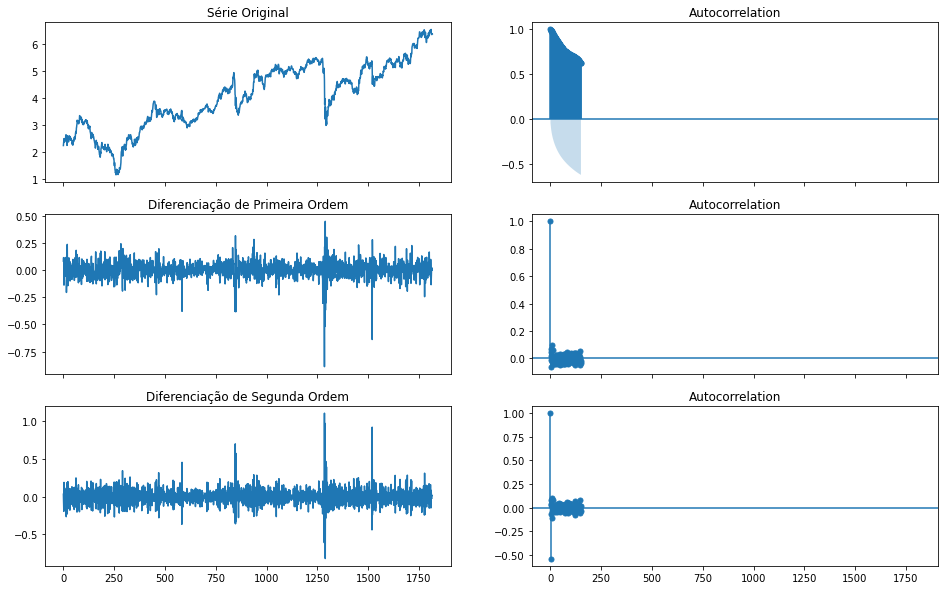

In [422]:
# Área de Plotagem
fig, axes = plt.subplots(3, 2, sharex = True)

# Série Original
axes[0, 0].plot(df_treino['Close'].values); axes[0, 0].set_title('Série Original')
plot_acf(df_treino['Close'].values, lags = 150, ax = axes[0, 1])

# Diferenciação de Primeira Ordem
axes[1, 0].plot(np.diff(df_treino['Close'].values)); axes[1, 0].set_title('Diferenciação de Primeira Ordem')
plot_acf(np.diff(df_treino['Close'].values), lags = 150, ax = axes[1, 1])

# Diferenciação de Segunda Ordem
axes[2, 0].plot(np.diff(np.diff(df_treino['Close'].values))); axes[2, 0].set_title('Diferenciação de Segunda Ordem')
plot_acf(np.diff(np.diff(df_treino['Close'].values)), lags = 150, ax = axes[2, 1])

plt.show()

Fica claro que a Diferenciação distribuiu melhor a série. Ou seja, o valor d = 1 ou d = 2 parecem ser boas opções para o Modelo ARIMA.

Vamos testar utilizando a função ndiffs:

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html

In [423]:
# Teste ADF
print(ndiffs(df_valid['Close'], test = 'adf'))
print(ndiffs(df_treino['Close'], test = 'adf'))

2
0


In [424]:
# Teste KPSS 
print(ndiffs(df_treino['Close'], test = 'kpss'))
print(ndiffs(df_treino['Close'], test = 'kpss'))

1
1


O Teste ADF indicou d = 2 para o conjunto de validação e d = 0 para o conjunto de treino enquanto que o Teste KPSS indicou d = 1 para ambos os conjuntos. Vamos escolher d = 1.

Já temos o I de ARIMA, o parâmetro d. Agora vamos encontrar o termo AR, com o parâmetro p.

**Determinando o Valor do Parâmetro p para o Modelo ARIMA**

A próxima etapa é identificar se o modelo precisa de termos AR. Você pode descobrir o número necessário de termos AR, inspecionando o gráfico PACF (Partial Autocorrelation). Mas o que é PACF?

A autocorrelação parcial pode ser imaginada como a correlação entre a série e seu atraso, após excluir as contribuições dos atrasos intermediários. Portanto, o PACF meio que transmite a correlação pura entre um atraso e a série. Dessa forma, você saberá se esse atraso é necessário no termo AR ou não.

Qualquer autocorrelação em uma série estacionarizada pode ser retificada adicionando termos AR suficientes. Portanto, inicialmente consideramos a ordem do termo AR igual a tantas defasagens que ultrapassam o limite de significância no gráfico PACF.

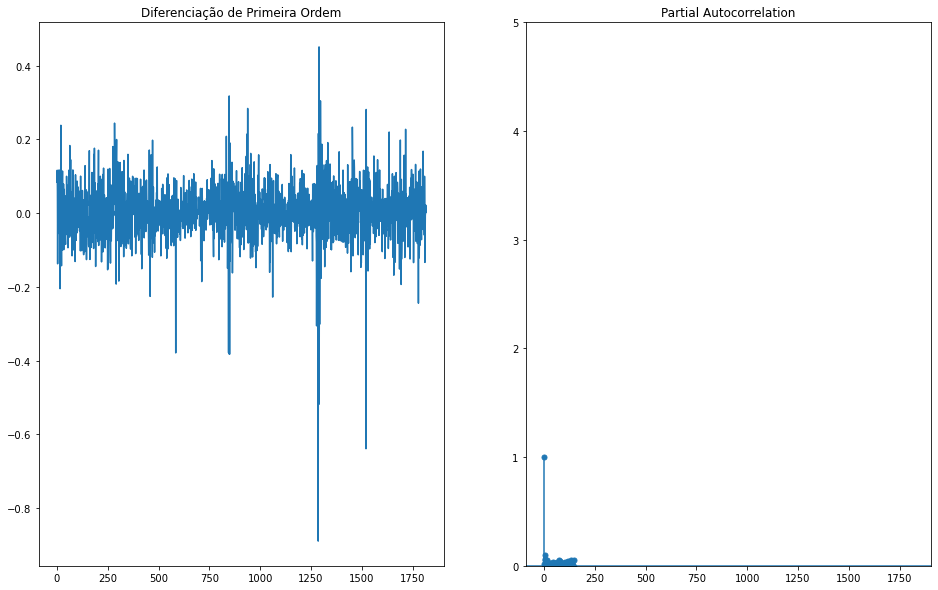

In [425]:
# Gráfico PACF
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(df_treino['Close'])); axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (0,5))
plot_pacf(np.diff(df_treino['Close']), lags = 150, ax = axes[1])
plt.show()

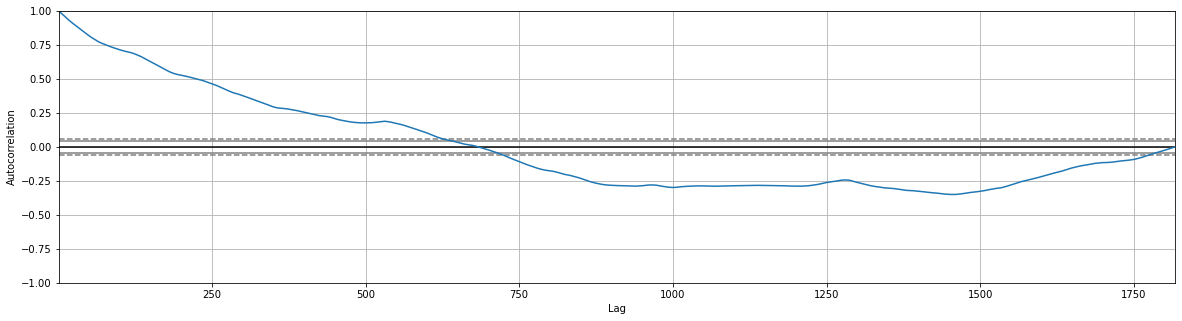

In [426]:
# Autocorrelation Plot
plt.figure(figsize = [20,5]) 
autocorrelation_plot(df_treino['Close'])
plt.show()

Você pode observar que o atraso (lag) 1 é bastante significativo, pois está bem acima da linha de significância. O atraso 2 também é significativo, conseguindo ultrapassar o limite de significância. Mas vou ser conservador e definir o valor do parâmetro p igual a 1. Já temos o termo AR. Falta um. 

**Determinando o Valor do Parâmetro q para o Modelo ARIMA**

Assim como observamos o gráfico PACF para o número de termos AR, você pode observar para o gráfico ACF para o número de termos MA. Um termo MA é tecnicamente o erro da previsão atrasada.

O ACF informa quantos termos MA são necessários para remover qualquer autocorrelação na série estacionarizada.

Vamos ver o gráfico de autocorrelação das séries diferenciadas.

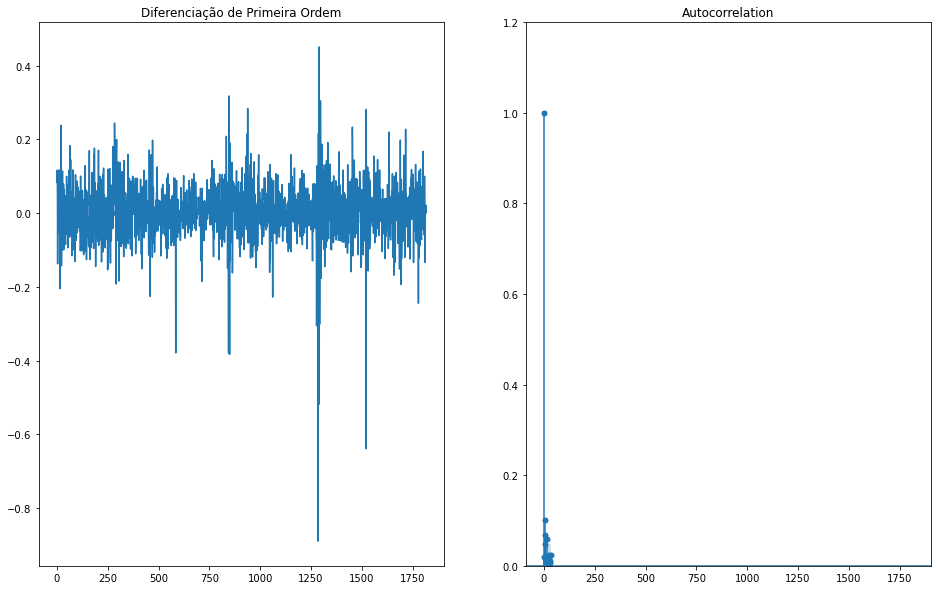

In [427]:
# Gráfico ACF
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(np.diff(df_treino['Close'])); axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (0,1.2))
plot_acf(np.diff(df_treino['Close']), ax = axes[1])
plt.show()

O gráfico de autocorrelação indica que temos pelo menos um valor acima do limite de 0.2. Ou seja, q = 1 é o mínimo que deveríamos testar, embora o q = 2 seja uma opção. Você pode testar as duas opções se desejar, mas eu vou escolher q = 1.

> `Já temos os 3 parâmetros para o Modelo ARIMA (p, d, q) - order(1, 1, 1).`

In [429]:
# Cria o Modelo ARIMA

# Definimos:

# p = 2
# d = 1
# q = 0

# Aqui o valor q é zero, pois é apenas o modelo AR. Na sequência eu explico porque.

# Modelo
modelo_AR = ARIMA(df_treino['Close'], order = (1, 1, 1))

# Treinamento
modelo_v2 = modelo_AR.fit(disp = -1) 

# Forecast
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
fc, se, conf = modelo_v2.forecast(len(df_valid), alpha = 0.05)

In [430]:
df_valid['ARIMA V2'] = fc

df_limites = pd.DataFrame()
df_limites['Limite Inferior'] = conf[:, 0]
df_limites['Limite Superior'] = conf[:, 1]
df_limites.index = df_valid.index


df_valid['ARIMA V2'] = df_valid['ARIMA V2'].apply(lambda x: inv_boxcox(x, lambda_value))
df_limites['Limite Inferior'] = df_limites['Limite Inferior'].apply(lambda x: inv_boxcox(x, lambda_value))
df_limites['Limite Superior'] = df_limites['Limite Superior'].apply(lambda x: inv_boxcox(x, lambda_value))

In [431]:
exibirResultadosComMargem(df_treino, df_valid, df_limites, 'ARIMA V2')

O Resultado com a Métrica RMSE foi de: 2.543676317290654


**Seasonal Autoregressive Integrated Moving-Average (SARIMA)**


A Média Móvel Integrada Autoregressiva Sazonal, SARIMA ou ARIMA Sazonal, é uma extensão do ARIMA que suporta explicitamente dados de séries temporais univariadas com um componente sazonal.

Esse modelo adiciona três novos hiperparâmetros para especificar a regressão automática (AR), a diferenciação (I) e a média móvel (MA) para o componente sazonal da série, além de um parâmetro adicional para o período da sazonalidade.

**Elementos de Tendência:**

No modelo SARIMA existem três elementos de tendência que requerem configuração. Eles são iguais ao modelo ARIMA, especificamente:

- p: Ordem de regressão automática da tendência.
- d: Ordem de diferenciação da tendência.
- q: Ordem média móvel de tendência.

**Elementos de Sazonalidade:**

E temos mais quatro elementos sazonais que não fazem parte do ARIMA e que devem ser configurados no modelo SARIMA. Eles são:

- P: Ordem autoregressiva sazonal.
- D: Ordem da diferença sazonal.
- Q: Ordem da média móvel sazonal.
- m: O número de etapas de tempo para um único período sazonal. Por exemplo, um S de 12 para dados mensais sugere um ciclo sazonal anual.

**Notação SARIMA:**<br/>
SARIMA(p,d,q)(P,D,Q,m)

********* ATENÇÃO *********

Fique sempre atento às letras maiúsculas e minúsculas, pois isso faz toda diferença na interpretação dos parâmetros de ordem do modelo.

Criaremos algumas versões de modelo SARIMA a partir desta aula, para nosso problema de previsão de vendas, usando diferentes estratégias de Grid Search para busca dos valores ideais dos parâmetros de ordem.

O pacote pmdarima será útil em nosso trabalho: https://alkaline-ml.com/pmdarima/index.html

--- 
Até agora, restringimos nossa atenção aos dados não sazonais e aos modelos ARIMA não sazonais. No entanto, os modelos ARIMA também são capazes de modelar uma ampla variedade de dados sazonais.

A **Média Móvel Integrada Autoregressiva (ARIMA)** é um método de previsão para dados univariados de séries temporais.

Como o próprio nome sugere, ele suporta elementos médios autoregressivos e móveis. O elemento integrado refere-se à diferenciação, permitindo que o método suporte dados de séries temporais com uma tendência.

Um problema com o ARIMA é que ele não suporta dados sazonais, que é uma série temporal com um ciclo de repetição.

O ARIMA espera dados que não sejam sazonais ou que o componente sazonal seja removido, por exemplo, ajustado sazonalmente por métodos como diferenciação sazonal.

A **Média Móvel Integrada Autoregressiva Sazonal, SARIMA ou ARIMA Sazonal**, é uma extensão do ARIMA que suporta explicitamente dados de séries temporais univariadas com um componente sazonal.

Ele adiciona três novos hiperparâmetros para especificar a regressão automática (AR), a diferenciação (I) e a média móvel (MA) para o componente sazonal da série, além de um parâmetro adicional para o período da sazonalidade.

Um modelo ARIMA sazonal é formado pela inclusão de termos sazonais adicionais no ARIMA. A parte sazonal do modelo consiste em termos muito semelhantes aos componentes não sazonais do modelo, mas envolvem turnos alternados do período sazonal.

Um modelo ARIMA Sazonal é formado pela inclusão de termos sazonais adicionais nos modelos ARIMA que vimos até agora. Ou seja:

- Modelo ARIMA não sazonal = ARIMA(p, d, q)

- Modelo ARIMA sazonal = SARIMA(p,d,q)(P,D,Q,m)

Um modelo de média móvel integrada autoregressiva sazonal (SARIMA) é um passo diferente de um modelo ARIMA baseado no conceito de tendências sazonais. 

Em muitos dados de séries temporais, efeitos sazonais frequentes entram em cena. Tomemos, por exemplo, a temperatura média medida em um local com quatro estações. Haverá um efeito sazonal anualmente, e a temperatura nesta estação em particular definitivamente terá uma forte correlação com a temperatura medida no ano passado na mesma estação.

Considere o modelo SARIMA abaixo:

**SARIMA(3,1,0)(1,1,0)12**

O parâmetro m influencia os parâmetros P, D e Q. Por exemplo, um m de 12 para dados mensais sugere um ciclo sazonal anual.

O parâmetro P = 1 usaria a primeira observação sazonalmente deslocada no modelo, ou seja, t-(m * 1) ou t-12.

O parâmetro P = 2, usaria as duas últimas observações de compensação sazonal t-(m * 1), t-(m * 2).

Da mesma forma, um D de 1 calcularia uma diferença sazonal de primeira ordem e um Q = 1 usaria erros de primeira ordem no modelo (por exemplo, média móvel).

Um modelo ARIMA sazonal usa diferenciação em um atraso igual ao número de seasons para remover efeitos sazonais aditivos. Assim como na diferenciação do atraso 1 para remover uma tendência, a diferenciação do atraso introduz um termo médio móvel. O modelo ARIMA sazonal inclui termos médios autoregressivos e móveis em lag s.

**Grid Search Método 1 - Stepwise Search**

Usando um Modelo Auto-Arima para retornar os melhores parâmetros de ordem da série, para o menor valor possível da Estatística AIC.

Fazer uma análise manual completa de séries temporais pode ser uma tarefa tediosa, especialmente quando você tem muitos conjuntos de dados para analisar. É preferível automatizar a tarefa de seleção de modelo com a pesquisa em grade (Grid Search). Para o SARIMA, como temos muitos parâmetros, a pesquisa em grade pode levar horas para ser concluída em um conjunto de dados se definirmos o limite de cada parâmetro muito alto. Definir limites muito altos também tornará seu modelo muito complexo e superestimará os dados de treinamento.

Para evitar o longo tempo de execução e o problema de sobreajuste (overfitting), aplicamos o que é conhecido como princípio de parcimônia, onde criamos uma combinação de todos os parâmetros tais que p + d + q + P + D + Q ≤ 6. Outra abordagem é definir cada parâmetro como 0 ou 1 ou 2 e fazer a pesquisa na grade usando o AIC em cada combinação. 

Usaremos a segunda opção, chamada Grid Search Stepwise. Vou definir limites pequenos para os hiperparâmetros, mas você pode testar outros valores se desejar.

In [234]:
# Buscando pela ordem ideal para o modelo
# A função pm.auto_arima aplica o Grid Search e retorna o melhor modelo
modelo_v3 = pm.auto_arima(df_treino['Close'],
                          seasonal = True, 
                          m = 12,
                          d = 0, 
                          D = 1, 
                          max_p = 2, 
                          max_q = 2,
                          trace = True,
                          error_action = 'ignore',
                          suppress_warnings = True) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=9.78 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=539.680, Time=0.30 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-3443.249, Time=2.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-1141.816, Time=2.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=554.020, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-2916.171, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-3655.523, Time=7.68 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=535.257, Time=2.38 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-3654.781, Time=11.17 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-3654.710, Time=12.65 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-1146.310, Time=4.38 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-3669.277, Time=20.09 sec
 ARIMA(2,0,1)(1,1,0)[12] 

Analisando o resultado do Grid Search Stepwise percebemos que este é o melhor modelo:
    
Fit ARIMA: (2,0,1)x(2,1,0, 12) (constant=True); AIC=3669.277 Time=20.09 seconds

Melhor Modelo: 

- arima_order = (2,0,1)

- seasonal_order = (2,1,0, 12)

- AIC = 3669.277

In [235]:
# Print do sumário do melhor modelo encontrado
print(modelo_v1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1816
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2100.069
Method:                       css-mle   S.D. of innovations              0.076
Date:                Mon, 08 Aug 2022   AIC                          -4192.137
Time:                        10:11:50   BIC                          -4170.120
Sample:                             1   HQIC                         -4184.013
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.002      1.337      0.181      -0.001       0.006
ar.L1.D.Close    -0.0602      0.023     -2.566      0.010      -0.106      -0.014
ar.L2.D.Close     0.0155      0.023     

Vamos então usar os valores encontrados pelo Grid Search e treinar um modelo SARIMA.

A implementação no Statsmodels é chamada SARIMAX em vez de SARIMA e a adição de "X" ao nome do método significa que a implementação também suporta variáveis exógenas.

Essas são variáveis de séries temporais paralelas que não são modeladas diretamente pelos processos AR, I ou MA, mas são disponibilizadas como entrada ponderada para o modelo.

Variáveis exógenas são opcionais e podem ser especificadas através do argumento “exog”.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [492]:
# Cria o Modelo SARIMA
modelo_sarima_v1 = sm.tsa.statespace.SARIMAX(df_treino['Close'],
                                                order = (1, 2, 1),
                                                seasonal_order = (2, 1, 0, 60),
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)

# Treinamento (Fit) do modelo
modelo_sarima_v1_fit = modelo_sarima_v1.fit()

# Sumário do modelo
print(modelo_sarima_v1_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1817
Model:             SARIMAX(1, 2, 1)x(2, 1, [], 60)   Log Likelihood                1622.763
Date:                             Mon, 08 Aug 2022   AIC                          -3235.527
Time:                                     12:11:17   BIC                          -3208.533
Sample:                                          0   HQIC                         -3225.514
                                            - 1817                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0587      0.017     -3.464      0.001      -0.092      -0.025
ma.L1         -1.0000      

In [493]:
# Vamos fazer previsões um passo a frente
#sarima_predict_1 = modelo_sarima_v1_fit.get_prediction(dynamic = False)

fc = modelo_sarima_v1_fit.forecast(len(df_valid))

In [494]:
df_valid['SARIMA'] = fc.values

df_valid['SARIMA'] = df_valid['SARIMA'].apply(lambda x: inv_boxcox(x, lambda_value))

exibirResultados(df_treino, df_valid, 'SARIMA')

O Resultado com a Métrica RMSE foi de: 2.2771396548779266


<h3>Utilizando o modelo SARIMA para prever os próximos 6 meses</h3>

In [495]:
fc = modelo_sarima_v1_fit.forecast(180, alpha = 0.05)

<AxesSubplot:>

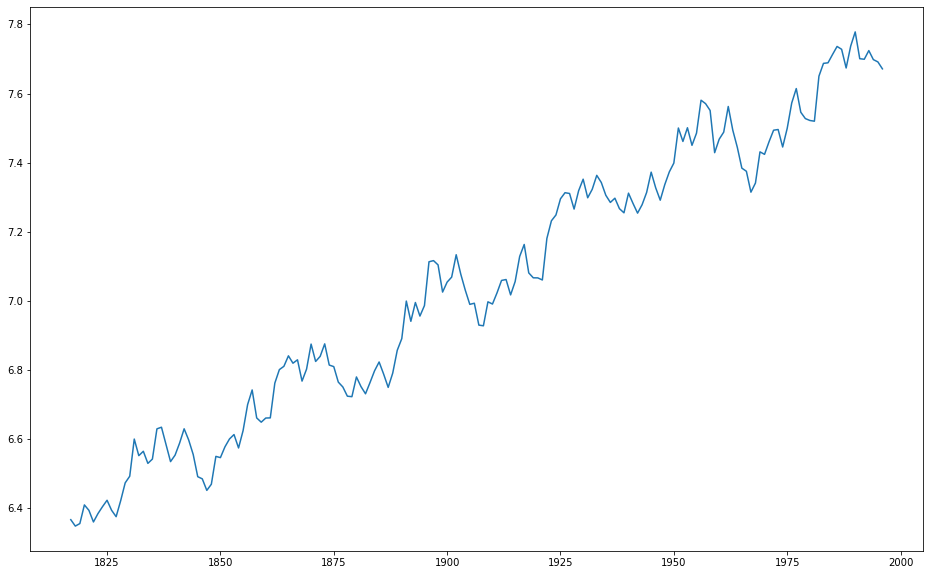

In [496]:
fc.plot()

In [307]:
df_treino = df_transformed[['CloseBoxCox']]
df_treino.index = df_transformed['Date'].values
df_treino.columns = ['Close']

In [313]:
df_treino['Close']

2015-01-06    2.229891
2015-01-07    2.313899
2015-01-08    2.430419
2015-01-09    2.486995
2015-01-12    2.349765
                ...   
2022-07-28    6.973863
2022-07-29    7.173773
2022-08-01    7.123926
2022-08-02    7.139882
2022-08-03    7.142006
Name: Close, Length: 1884, dtype: float64

In [308]:
# Cria o Modelo SARIMA
modelo_sarima_final = sm.tsa.statespace.SARIMAX(df_treino['Close'],
                                                order = (2, 0, 1),
                                                seasonal_order = (2, 1, 0, 12),
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)

# Treinamento (Fit) do modelo
modelo_sarima_final = modelo_sarima_final.fit()

In [321]:
# Vamos fazer previsões um passo a frente
sarima_predict_final = modelo_sarima_final.get_forecast(steps=60)
#sarima_predict_final = modelo_sarima_final.get_prediction(dynamic = False)

In [322]:
sarima_predict_final.predicted_mean

1884    7.179546
1885    7.144533
1886    6.978372
1887    6.989579
1888    6.990160
1889    6.988009
1890    6.945644
1891    6.933477
1892    7.091064
1893    7.078753
1894    7.065074
1895    7.059314
1896    7.113645
1897    7.139903
1898    7.013156
1899    6.987604
1900    7.066290
1901    7.086659
1902    7.066499
1903    7.044409
1904    7.108864
1905    7.034647
1906    7.061231
1907    7.098869
1908    7.151304
1909    7.142906
1910    7.067685
1911    7.079302
1912    7.184192
1913    7.202800
1914    7.207279
1915    7.256512
1916    7.413430
1917    7.359388
1918    7.366500
1919    7.369274
1920    7.407662
1921    7.384319
1922    7.239825
1923    7.239261
1924    7.271728
1925    7.273311
1926    7.240363
1927    7.234961
1928    7.370719
1929    7.333543
1930    7.327370
1931    7.327139
1932    7.373485
1933    7.378558
1934    7.253427
1935    7.236174
1936    7.305847
1937    7.318075
1938    7.296001
1939    7.287019
1940    7.380344
1941    7.314392
1942    7.3269

---
<h2>EXPORTANDO O MODELO</h2>

---
<h2>CONSIDERAÇÕES SOBRE OS RESULTADOS OBTIDOS</h2>